Интернет-магазин «Стримчик» продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании. Перед нами данные до 2016 года. Представим, что сейчас декабрь 2016 г., и мы планируем кампанию на 2017-й. Нужно отработать принцип работы с данными. В наборе данных попадается аббревиатура ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков».
Цель проекта: Выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

**Описание данных:**

`Name` — название игры
`Platform` — платформа
`Year_of_Release` — год выпуска
`Genre` — жанр игры
`NA_sales` — продажи в Северной Америке (миллионы проданных копий)
`EU_sales` — продажи в Европе (миллионы проданных копий)
`JP_sales` — продажи в Японии (миллионы проданных копий)
`Other_sales` — продажи в других странах (миллионы проданных копий)
`Critic_Score` — оценка критиков (максимум 100)
`User_Score` — оценка пользователей (максимум 10)
`Rating` — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

Данные за 2016 год могут быть неполными.

**Ход исследования:**

Шаг 1. Открыть файл с данными и изучить общую информацию
Шаг 2. Подготовить данные
Шаг 3. Провести исследовательский анализ данных
Шаг 4. Составить портрет пользователя каждого региона
Шаг 5. Проверить гипотезы:
- Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
- Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.

# Оглавление

* [Шаг 1. Открытие файла с данными и изучение общей информации](#Шаг-1.-Открытие-файла-с-данными-и-изучение-общей-информации)
    * [Выводы (шаг 1)](#Выводы-(шаг-1))
* [Шаг 2. Подготовка данных](#Шаг-2.-Подготовка-данных)
    * [Обработка пропусков и замена типа данных в столбцах](#Обработка-пропусков-и-замена-типа-данных-в-столбцах)
    * [Расчет суммарных продаж во всех регионах](#Расчет-суммарных-продаж-во-всех-регионах)
    * [Выводы (шаг 2)](#Выводы-(шаг-2))
* [Шаг 3. Исследовательский анализ данных](#Шаг-3.-Исследовательский-анализ-данных)
    * [Cколько игр выпускалось в разные годы](#Cколько-игр-выпускалось-в-разные-годы)
    * [Как менялись продажи игр по платформам](#Как-менялись-продажи-игр-по-платформам)
    * [Отделение данных за актуальный период](#Отделение-данных-за-актуальный-период)
    * [Какие платформы лидируют по продажам, растут или падают](#Какие-платформы-лидируют-по-продажам,-растут-или-падают)
    * [График «ящик с усами» по глобальным продажам каждой игры и разбивкой по платформам](#График-«ящик-с-усами»-по-глобальным-продажам-каждой-игры-и-разбивкой-по-платформам)
    * [Как влияют на продажи игр отзывы пользователей и критиков](#Как-влияют-на-продажи-игр-отзывы-пользователей-и-критиков)
    * [Распределение игр и продаж по жанрам](#Распределение-игр-и-продаж-по-жанрам)
    * [Выводы (шаг 3)](#Выводы-(шаг-3))
* [Шаг 4. Составление портрета пользователя каждого региона](#Шаг-4.-Составление-портрета-пользователя-каждого-региона)
    * [Самые популярные платформы](#Самые-популярные-платформы)
    * [Самые популярные жанры](#Самые-популярные-жанры)
    * [Влияние рейтинга ESRB на продажи](#Влияние-рейтинга-ESRB-на-продажи)
    * [Выводы (шаг 4)](#Выводы-(шаг-4))
* [Шаг 5. Общий вывод](#Шаг-6.-Общий-вывод)

# Шаг 1. Открытие файла с данными и изучение общей информации

In [238]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats as st

In [96]:
try:
    data = pd.read_csv('https://code.s3.yandex.net/datasets/games.csv')
except FileNotFoundError:
    print('Некорректно задан путь к файлу')

In [97]:
data.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [98]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [99]:
data.describe()

,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,16446.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000
mean,2006.484616,0.263377,0.145060,0.077617,0.047342,68.967679
std,5.877050,0.813604,0.503339,0.308853,0.186731,13.938165
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000


In [100]:
data.isna().sum() #количество пропущенных значений

Name                  2
Platform              0
Year_of_Release     269
Genre                 2
NA_sales              0
EU_sales              0
JP_sales              0
Other_sales           0
Critic_Score       8578
User_Score         6701
Rating             6766
dtype: int64

In [101]:
data.columns # названия столбцов

Index(['Name', 'Platform', 'Year_of_Release', 'Genre', 'NA_sales', 'EU_sales',
       'JP_sales', 'Other_sales', 'Critic_Score', 'User_Score', 'Rating'],
      dtype='object')

In [102]:
data['User_Score'].value_counts()

User_Score
tbd    2424
7.8     324
8       290
8.2     282
8.3     254
       ... 
1.1       2
1.9       2
9.6       2
0         1
9.7       1
Name: count, Length: 96, dtype: int64

In [103]:
data.duplicated().sum() # наличие дубликатов

0

## Выводы (шаг 1) 

Файл с данными содержит 11 столбцов (6 с плавающей точкой и 5 с объектами) и 16715 записей.


- В столбцах __Name__, __Year_of_Release__, __Genre__, __Critic_Score__, __User_Score__ и __Rating__ есть пропуски. Их необходимо обработать;
- Столбец __Year_of_Release__ содержит целочисленные данные (годы) и должен быть преобразован к соответствующему типу;
- В столбцах __NA_sales__, __EU_sales__, __JP_sales__ и __Other_sales__ содержится очень много нулей. Данную аномалию необходимо проверить;
- Столбец __Critic_Score__, предположительно, содержит целочисленные данные и должен быть преобразован к соответствующему типу;
- Столбец __User_Score__ имеет тип object, что означает, что в нем содержатся не только цифры и пропущенные значения. Данную аномалию необходимо обработать.
- Дубликаты отсутствуют.

# Шаг 2. Подготовка данных

### Приведение названий столбцов к нижнему регистру

In [104]:
data.columns = data.columns.str.lower()

data.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

## Обработка пропусков и замена типа данных в столбцах

### Удаление пропусков в столбцах name и genre

In [105]:
# Просмотр описания записей с пропуском в столбцах name и genre
data[data['name'].isnull()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


Всего две игры с большим количеством пропусков. Для заполнения пропущенных значений, данных очень мало - удалим их.

In [106]:


# Удаление записей с пропуском в столбце name
data.dropna(subset=['name'], inplace=True)

data[data['name'].isnull()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating


### Заполнение и удаление пропусков и приведение столбце year_of_release к целочисленному типу

In [107]:
# Проерка наличия аномалий в столбце
data['year_of_release'].unique()

array([2006., 1985., 2008., 2009., 1996., 1989., 1984., 2005., 1999.,
       2007., 2010., 2013., 2004., 1990., 1988., 2002., 2001., 2011.,
       1998., 2015., 2012., 2014., 1992., 1997., 1993., 1994., 1982.,
       2016., 2003., 1986., 2000.,   nan, 1995., 1991., 1981., 1987.,
       1980., 1983.])

In [108]:
# Оценка записей с пропущенными значениями в столбце year_of_release
display(data.isna().sum())
data[data['year_of_release'].isna()].head(10).sort_values('name')

name                  0
platform              0
year_of_release     269
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8576
user_score         6699
rating             6764
dtype: int64

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
719,Call of Duty 3,Wii,NaN,Shooter,1.17,0.84,0.00,0.23,69.0,6.7,T
377,FIFA Soccer 2004,PS2,NaN,Sports,0.59,2.36,0.04,0.51,84.0,6.4,E
657,Frogger's Adventures: Temple of the Frog,GBA,NaN,Adventure,2.15,0.18,0.00,0.07,73.0,tbd,E
456,LEGO Batman: The Videogame,Wii,NaN,Action,1.80,0.97,0.00,0.29,74.0,7.9,E10+
678,LEGO Indiana Jones: The Original Adventures,Wii,NaN,Action,1.51,0.61,0.00,0.21,78.0,6.6,E10+
183,Madden NFL 2004,PS2,NaN,Sports,4.26,0.26,0.01,0.71,94.0,8.5,E
627,Rock Band,X360,NaN,Misc,1.93,0.33,0.00,0.21,92.0,8.2,T
805,Rock Band,Wii,NaN,Misc,1.33,0.56,0.00,0.20,80.0,6.3,T
609,Space Invaders,2600,NaN,Shooter,2.36,0.14,0.00,0.03,NaN,NaN,NaN
475,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,1.57,1.02,0.00,0.41,NaN,NaN,NaN


In [109]:
data[data['name'] == 'Call of Duty 3']

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
557,Call of Duty 3,X360,2006.0,Shooter,1.49,0.92,0.02,0.27,82.0,6.5,T
719,Call of Duty 3,Wii,NaN,Shooter,1.17,0.84,0.00,0.23,69.0,6.7,T
1255,Call of Duty 3,PS3,2006.0,Shooter,0.60,0.62,0.03,0.26,80.0,6.9,T
1915,Call of Duty 3,PS2,2006.0,Shooter,0.89,0.03,0.00,0.15,82.0,7.4,T


In [110]:
data[data['name'] == 'LEGO Batman: The Videogame']

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
397,LEGO Batman: The Videogame,X360,2008.0,Action,2.04,1.02,0.0,0.32,76.0,7.9,E10+
456,LEGO Batman: The Videogame,Wii,NaN,Action,1.80,0.97,0.0,0.29,74.0,7.9,E10+
460,LEGO Batman: The Videogame,DS,2008.0,Action,1.75,1.01,0.0,0.29,72.0,8,E10+
1519,LEGO Batman: The Videogame,PS3,2008.0,Action,0.72,0.39,0.0,0.19,75.0,7.7,E10+
1538,LEGO Batman: The Videogame,PSP,NaN,Action,0.57,0.44,0.0,0.27,73.0,7.4,E10+
1553,LEGO Batman: The Videogame,PS2,2008.0,Action,0.72,0.03,0.0,0.52,77.0,8.9,E10+
12465,LEGO Batman: The Videogame,PC,2008.0,Action,0.02,0.03,0.0,0.01,80.0,7.8,E10+


In [111]:
# Функция для вывода доли пропущенных значений в столбце
# column_name - (string) Название столбца
def get_missing_values_proportion(column_name):
    length = len(data.query(column_name + '.isnull()'))

    print('Пропущенных значений - {} ({:.2%})'.format(length, length / len(data)), sep='')

In [112]:
get_missing_values_proportion('year_of_release')

Пропущенных значений - 269 (1.61%)


По таблицам видно, что пропуски можно заполнить по совпадающим названиям игр. Годы релиза игры для разных платформ отличаются незначительно. Создадим переменную с играми без пропусков, создадим функцию и заменим пропуски.

In [113]:
# Функция для получения моды года релиза игры по разным платформам
# row - (Series) Строка из набора данных
# возвращает - (int) Мода года релиза игры по разным платформам
def get_year_of_release_mode(row):
    mode = data[
        (data.index != row.name) &
        (data['name'] == row['name']) &
        (data['year_of_release'].isnull() == False)
    ]['year_of_release'].mode()
    
    if len(mode) == 0:
        return np.NaN
    
    return mode[0]

In [114]:
# Создание DataFrame с играми у которых есть игры на разных платформах
duplicated_data = data[data['name'].isin(data[data['name'].duplicated()]['name'].unique())].copy()

duplicated_data.sort_values(by='name')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
3862,Frozen: Olaf's Quest,DS,2013.0,Platform,0.21,0.26,0.00,0.04,NaN,NaN,NaN
3358,Frozen: Olaf's Quest,3DS,2013.0,Platform,0.27,0.27,0.00,0.05,NaN,NaN,NaN
14658,007: Quantum of Solace,PC,2008.0,Action,0.01,0.01,0.00,0.00,70.0,6.3,T
9507,007: Quantum of Solace,DS,2008.0,Action,0.11,0.01,0.00,0.01,65.0,tbd,T
3120,007: Quantum of Solace,Wii,2008.0,Action,0.29,0.28,0.01,0.07,54.0,7.5,T
...,...,...,...,...,...,...,...,...,...,...,...
2583,pro evolution soccer 2011,PSP,2010.0,Sports,0.05,0.30,0.29,0.16,74.0,5.8,E
7149,pro evolution soccer 2011,Wii,2010.0,Sports,0.07,0.10,0.03,0.02,78.0,5.4,E
12648,pro evolution soccer 2011,PC,2010.0,Sports,0.00,0.05,0.00,0.01,79.0,NaN,NaN
15612,uDraw Studio: Instant Artist,X360,2011.0,Misc,0.01,0.01,0.00,0.00,54.0,5.7,E


In [115]:
# Проверка того, что годы релиза игры для разных платформ отличаются незначительно.
duplicated_data['year_of_release_mode'] = duplicated_data.apply(get_year_of_release_mode, axis=1)

print('Степень корреляции между модами годов релизов игр по разным платформам с реальными годами релиза -', duplicated_data['year_of_release_mode'].corr(duplicated_data['year_of_release']))

Степень корреляции между модами годов релизов игр по разным платформам с реальными годами релиза - 0.8927510270200424


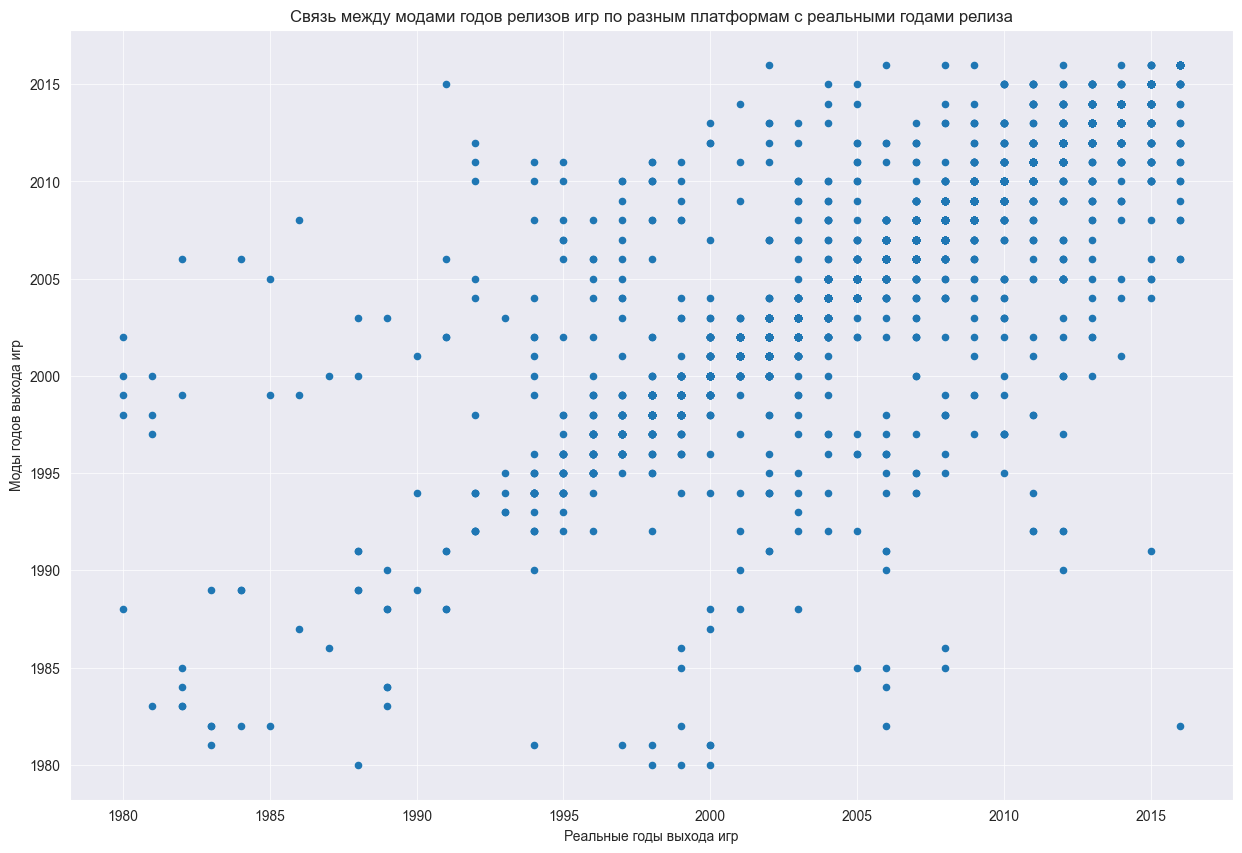

In [116]:
# Визуальная проверка гипотезы о том, что годы релиза игры для разных платформ отличаются незначительно (на основе моды)
duplicated_data.plot(kind='scatter', x='year_of_release', y='year_of_release_mode', figsize=(15, 10))
plt.xlabel('Реальные годы выхода игр')
plt.ylabel('Моды годов выхода игр')
plt.grid(linewidth=0.5)
plt.title('Связь между модами годов релизов игр по разным платформам с реальными годами релиза')
plt.show()

In [117]:
# Заполнение пропусков на моды годов релиза игр критиками по платформам
data.loc[data['year_of_release'].isnull(), 'year_of_release'] = data[data['year_of_release'].isnull()].apply(get_year_of_release_mode, axis=1)

get_missing_values_proportion('year_of_release')

Пропущенных значений - 146 (0.87%)


Остальные пропуски заполнить нет возможности. Пропусков в годе выпуска = 146, они принадлежат старым платформам. Так как их количество минимально, то их можно удалить.

In [118]:
# Удаление оставшихся пропусков
data.dropna(subset=['year_of_release'], inplace=True)

get_missing_values_proportion('year_of_release')

Пропущенных значений - 0 (0.00%)


In [119]:
# Приведение столбца к целочисленному типу
data['year_of_release'] = data['year_of_release'].astype('int')

data['year_of_release'].head()

0    2006
1    1985
2    2008
3    2009
4    1996
Name: year_of_release, dtype: int32

### Проверка столбца na_sales

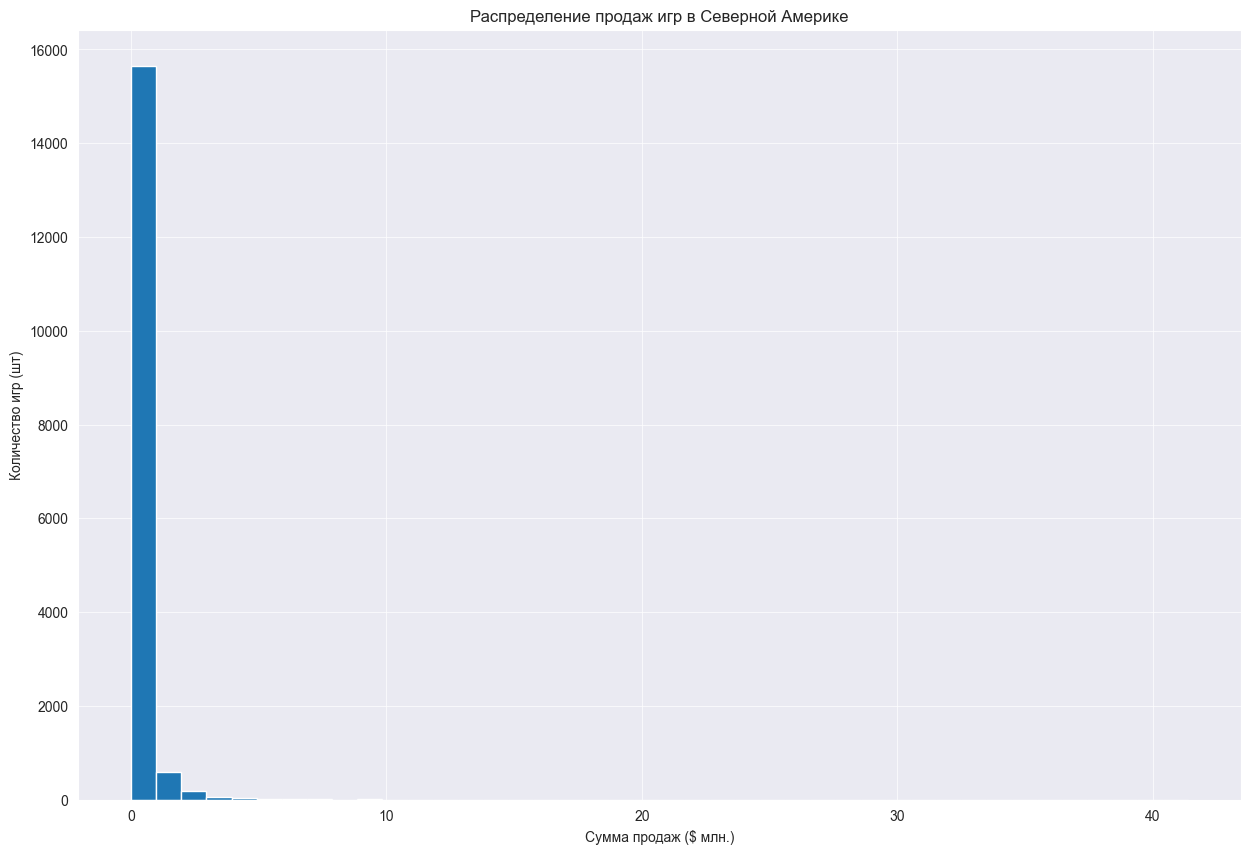

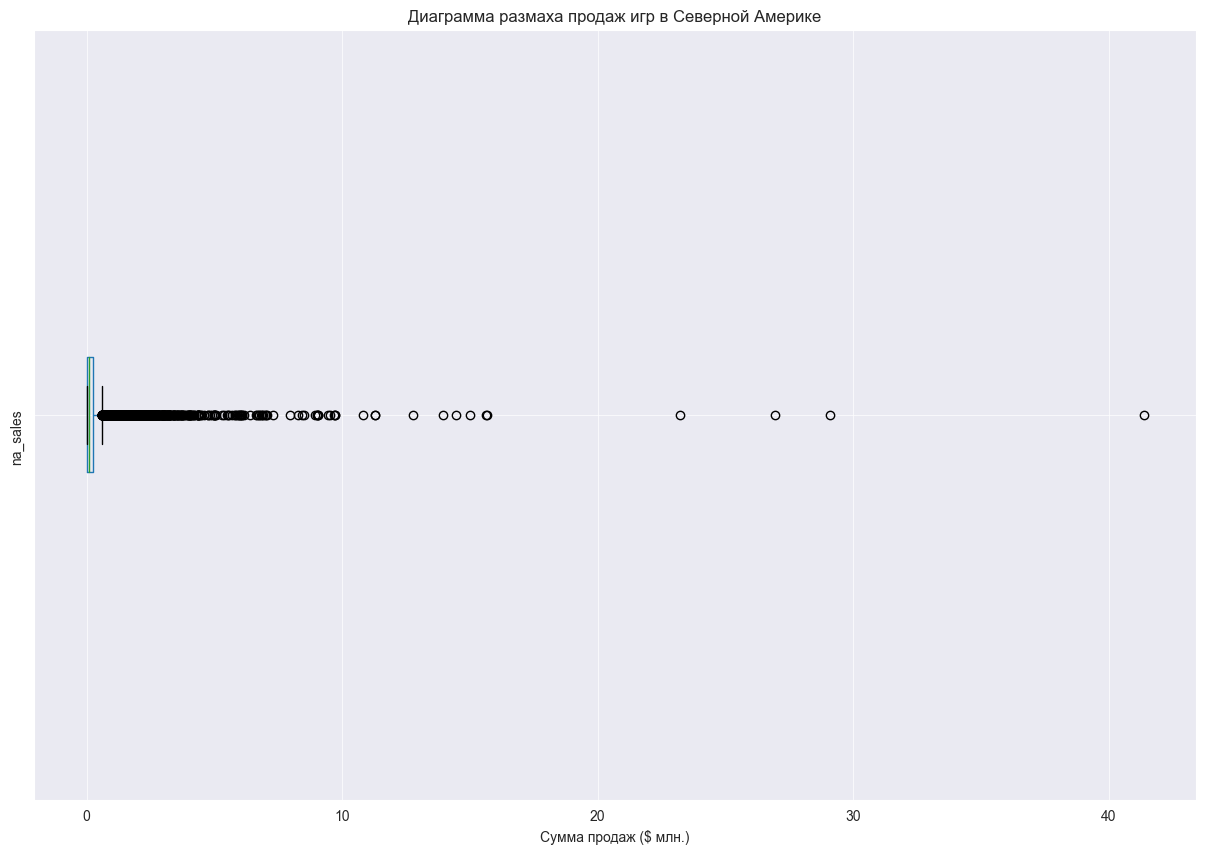

In [120]:
# Визуальная оценка распределения продаж в Северной Америке
data['na_sales'].hist(bins=42, figsize=(15, 10))
plt.xlabel('Сумма продаж ($ млн.)')
plt.ylabel('Количество игр (шт)')
plt.grid(linewidth=0.5)
plt.title('Распределение продаж игр в Северной Америке')
plt.show()

data.boxplot(column='na_sales', vert=False, figsize=(15, 10), rot=90)
plt.xlabel('Сумма продаж ($ млн.)')
plt.grid(linewidth=0.5)
plt.title('Диаграмма размаха продаж игр в Северной Америке')
plt.show()

In [121]:
print('Количество игр с продажами, равными 0 - {} ({:.2%})'.format(len(data.query('na_sales == 0')), len(data.query('na_sales == 0')) / len(data)))

Количество игр с продажами, равными 0 - 4468 (26.97%)


### Проверка столбца eu_sales

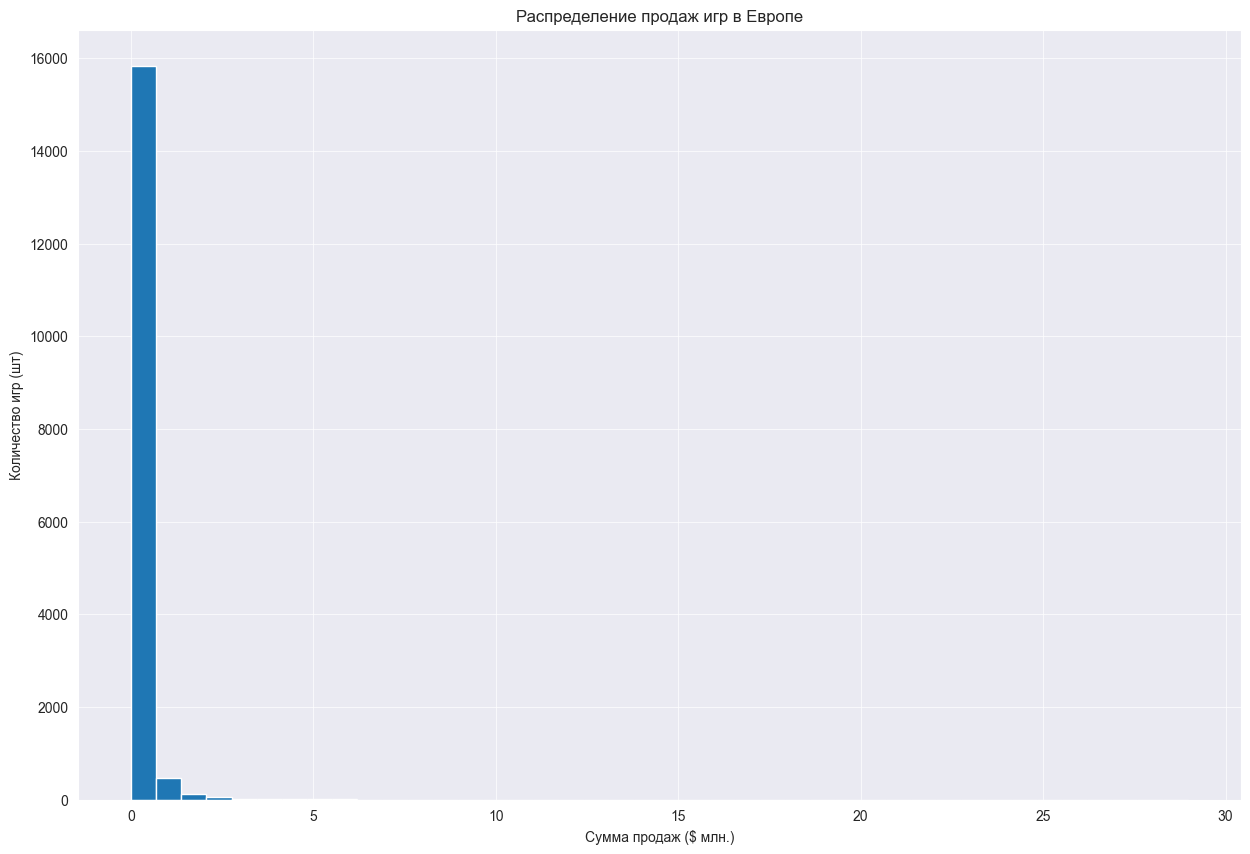

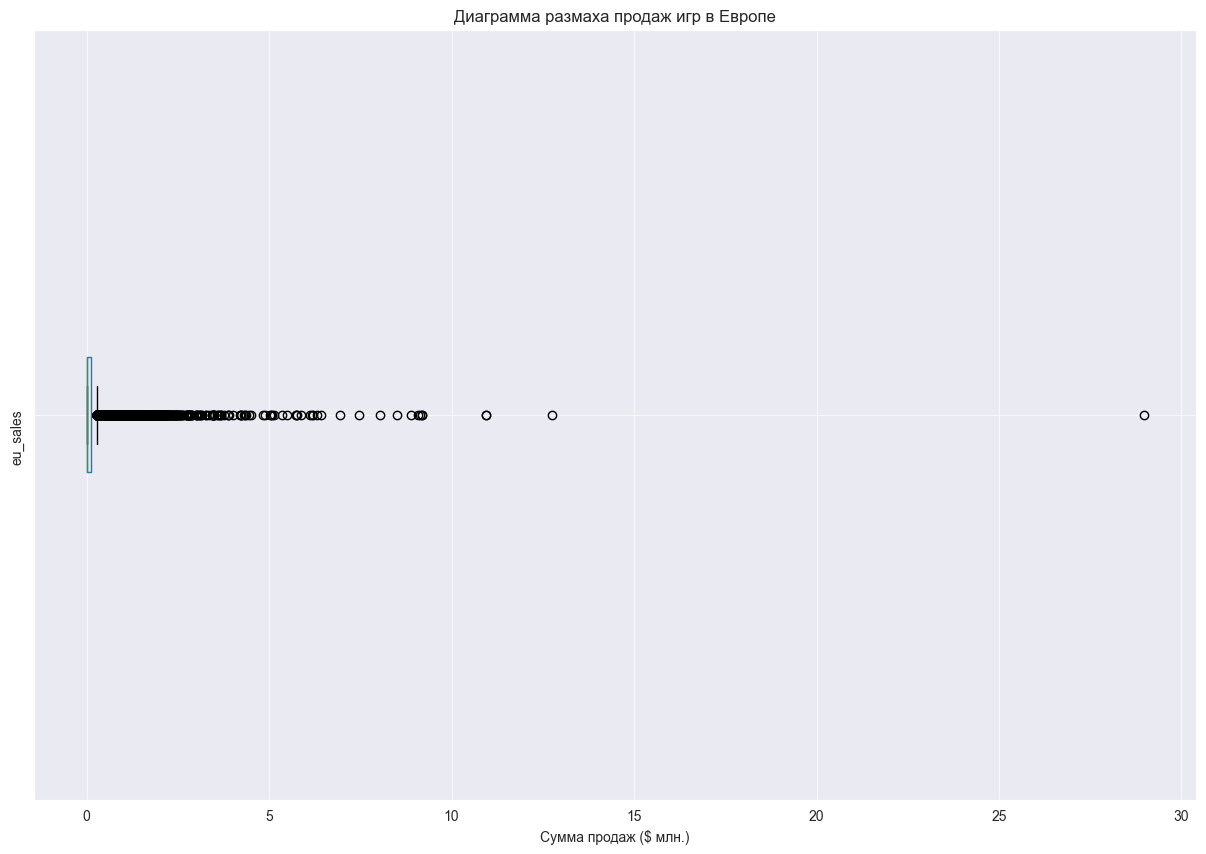

In [122]:
# Визуальная оценка распределения продаж в Европе
data['eu_sales'].hist(bins=42, figsize=(15, 10))
plt.xlabel('Сумма продаж ($ млн.)')
plt.ylabel('Количество игр (шт)')
plt.grid(linewidth=0.5)
plt.title('Распределение продаж игр в Европе')
plt.show()

data.boxplot(column='eu_sales', vert=False, figsize=(15, 10), rot=90)
plt.xlabel('Сумма продаж ($ млн.)')
plt.grid(linewidth=0.5)
plt.title('Диаграмма размаха продаж игр в Европе')
plt.show()

In [123]:
print('Количество игр с продажами, равными 0 - {} ({:.2%})'.format(len(data.query('eu_sales == 0')), len(data.query('eu_sales == 0')) / len(data)))

Количество игр с продажами, равными 0 - 5800 (35.01%)


### Проверка столбца jp_sales

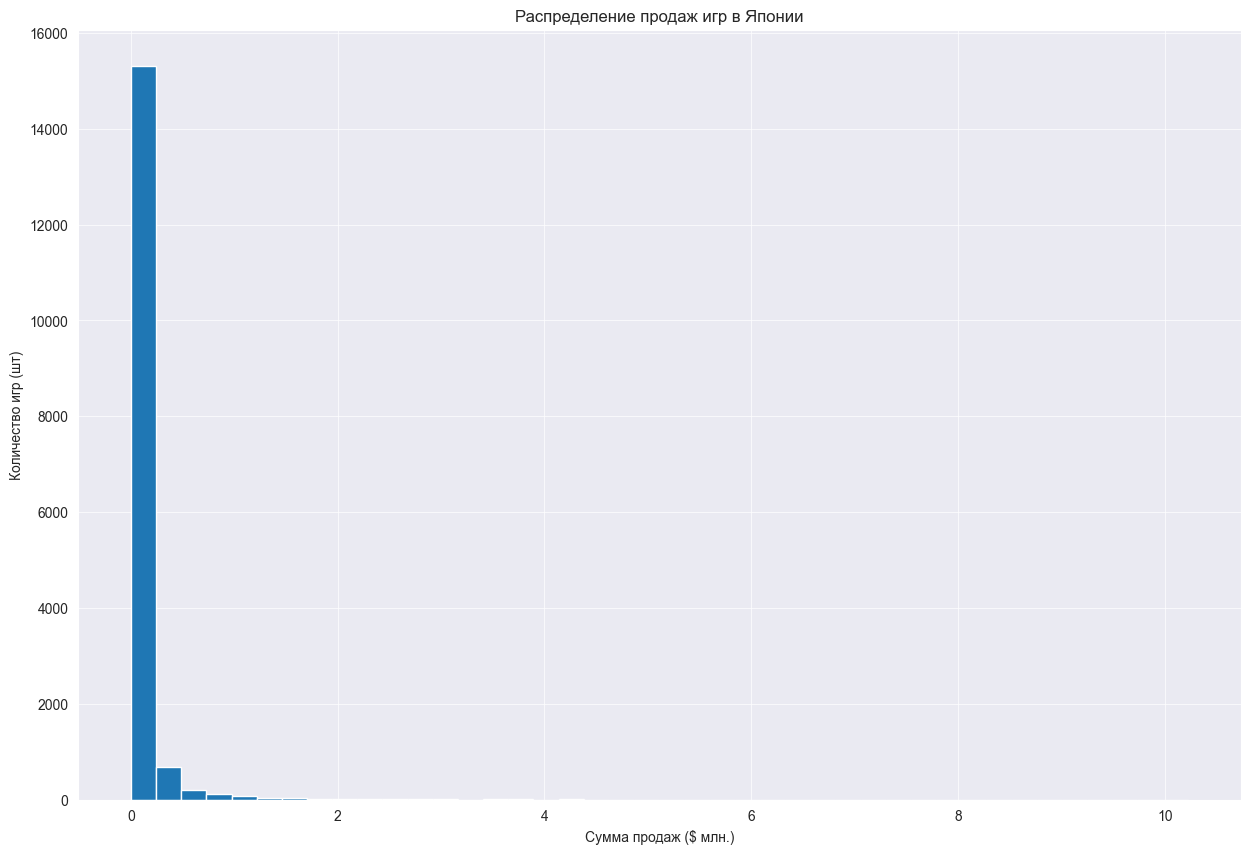

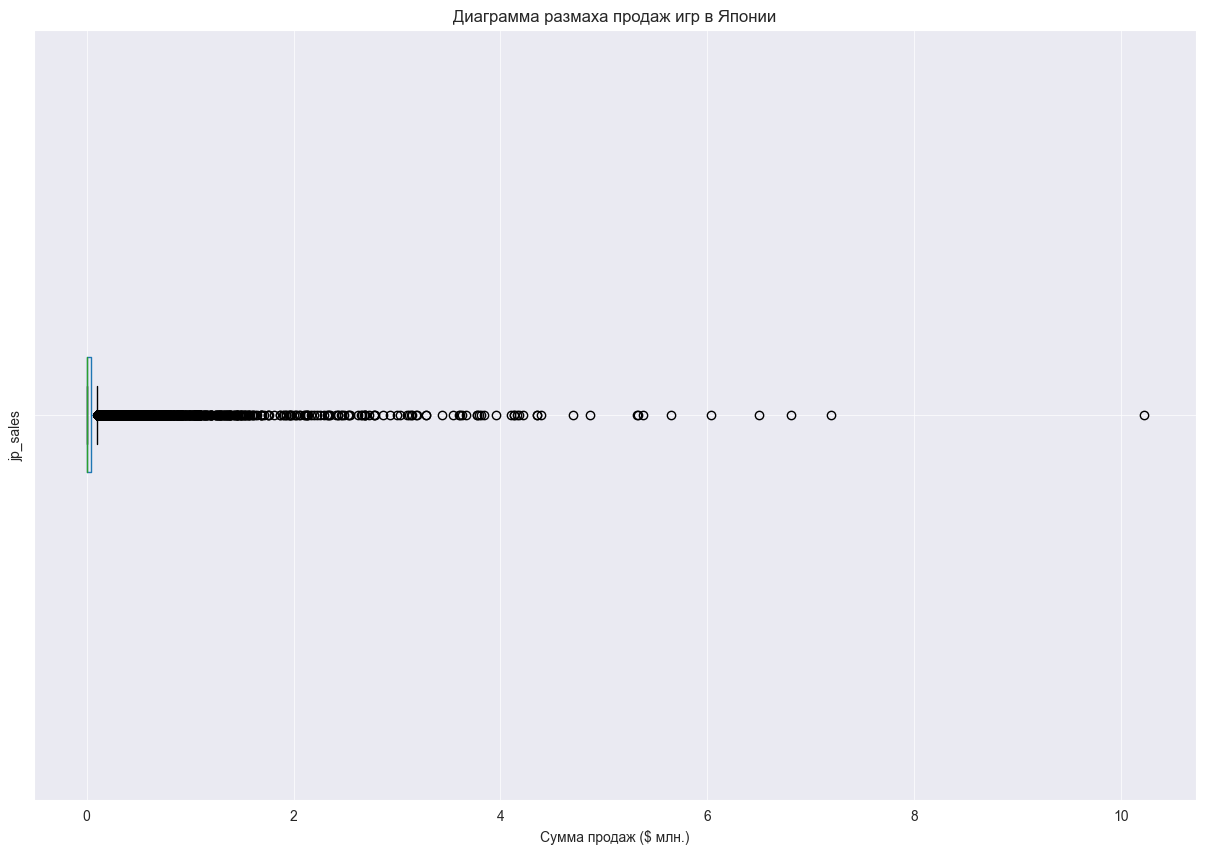

In [124]:
# Визуальная оценка распределения продаж в Японии
data['jp_sales'].hist(bins=42, figsize=(15, 10))
plt.xlabel('Сумма продаж ($ млн.)')
plt.ylabel('Количество игр (шт)')
plt.grid(linewidth=0.5)
plt.title('Распределение продаж игр в Японии')
plt.show()

data.boxplot(column='jp_sales', vert=False, figsize=(15, 10), rot=90)
plt.xlabel('Сумма продаж ($ млн.)')
plt.grid(linewidth=0.5)
plt.title('Диаграмма размаха продаж игр в Японии')
plt.show()

In [125]:
print('Количество игр с продажами, равными 0 - {} ({:.2%})'.format(len(data.query('jp_sales == 0')), len(data.query('jp_sales == 0')) / len(data)))

Количество игр с продажами, равными 0 - 10407 (62.82%)


### Проверка столбца other_sales

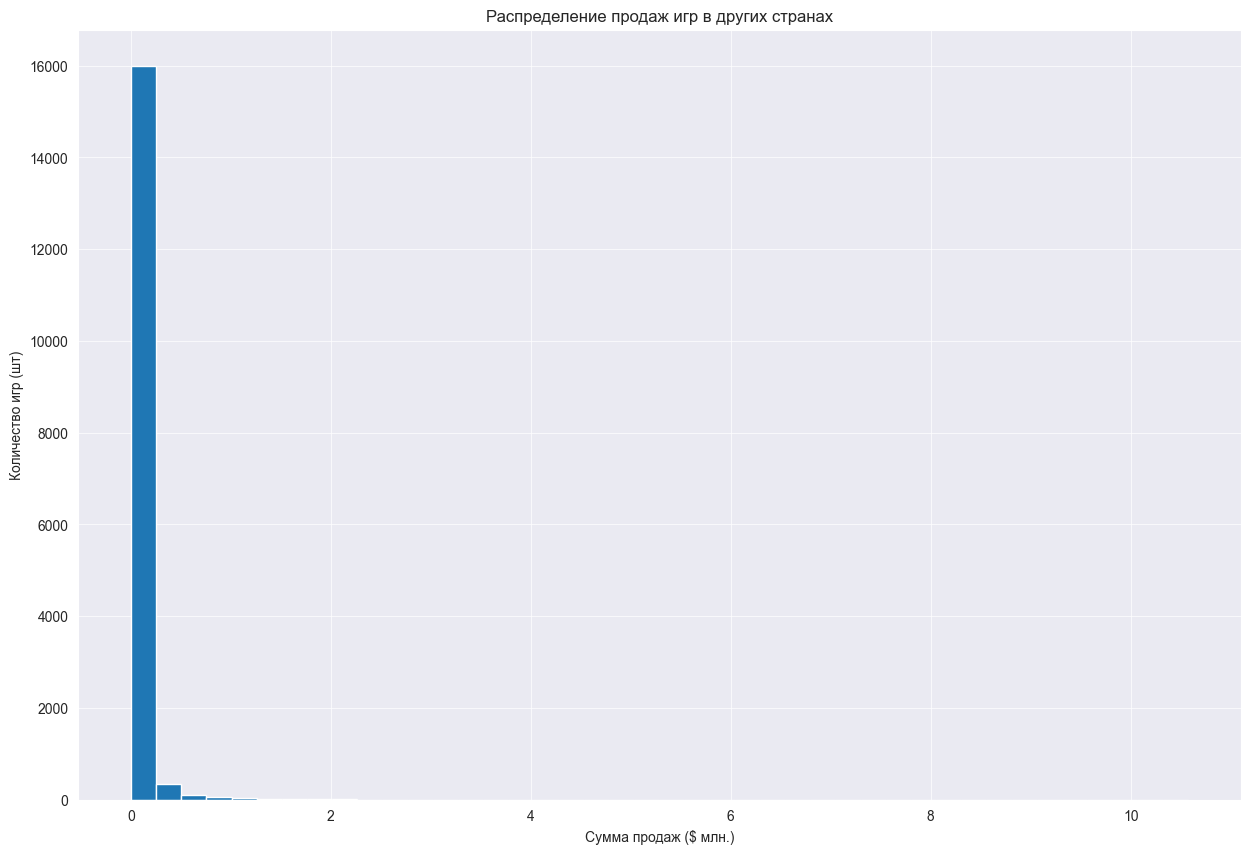

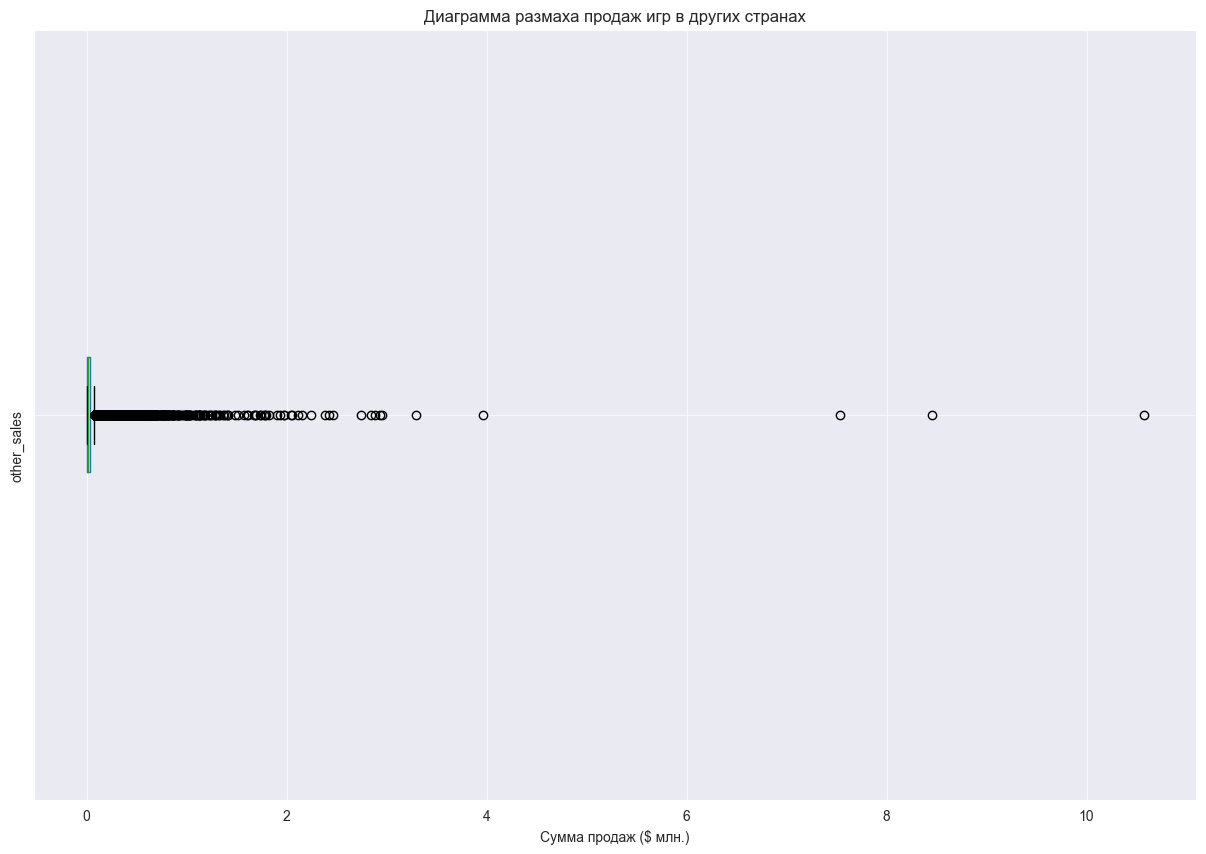

In [126]:
# Визуальная оценка распределения продаж в других странах
data['other_sales'].hist(bins=42, figsize=(15, 10))
plt.xlabel('Сумма продаж ($ млн.)')
plt.ylabel('Количество игр (шт)')
plt.grid(linewidth=0.5)
plt.title('Распределение продаж игр в других странах')
plt.show()

data.boxplot(column='other_sales', vert=False, figsize=(15, 10), rot=90)
plt.xlabel('Сумма продаж ($ млн.)')
plt.grid(linewidth=0.5)
plt.title('Диаграмма размаха продаж игр в других странах')
plt.show()

In [127]:
print('Количество игр с продажами, равными 0 - {} ({:.2%})'.format(len(data.query('other_sales == 0')), len(data.query('other_sales == 0')) / len(data)))

Количество игр с продажами, равными 0 - 6527 (39.40%)


### Заполнение пропусков в столбце critic_score

In [128]:
# Оценка основных статистических параметров столбца
data['critic_score'].describe()

count    8075.000000
mean       68.991950
std        13.923383
min        13.000000
25%        60.000000
50%        71.000000
75%        79.000000
max        98.000000
Name: critic_score, dtype: float64

Оценка критиков разнится от 13 до 98 баллов за игру со средним значением в 69 баллов, близким к медианному (71 балл). Это говорит о том, что игры в Датасете представлены достаточно равномерно: от низко оцененных критиками до имеющих максимальной оценкой.


In [129]:
# Визуальная оценка распределения данных столбца
data['critic_score'].isna().mean()

0.5125852598539264

In [130]:
get_missing_values_proportion('critic_score')

Пропущенных значений - 8492 (51.26%)


In [131]:
# Визуальная оценка записей с пропущенными значениями в столбце critic_score
data[(data['critic_score'].isnull())].head(15)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
9,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN
10,Nintendogs,DS,2005,Simulation,9.05,10.95,1.93,2.74,NaN,NaN,NaN
12,Pokemon Gold/Pokemon Silver,GB,1999,Role-Playing,9.00,6.18,7.20,0.71,NaN,NaN,NaN
18,Super Mario World,SNES,1990,Platform,12.78,3.75,3.54,0.55,NaN,NaN,NaN
20,Pokemon Diamond/Pokemon Pearl,DS,2006,Role-Playing,6.38,4.46,6.04,1.36,NaN,NaN,NaN
21,Super Mario Land,GB,1989,Platform,10.83,2.71,4.18,0.42,NaN,NaN,NaN
22,Super Mario Bros. 3,NES,1988,Platform,9.54,3.44,3.84,0.46,NaN,NaN,NaN


In [132]:
critscore_nan_year = (data
                          .loc[data['critic_score'].isna()==True]
                          .pivot_table(index='year_of_release', values='name', aggfunc='count')
                          .reset_index()
                     )

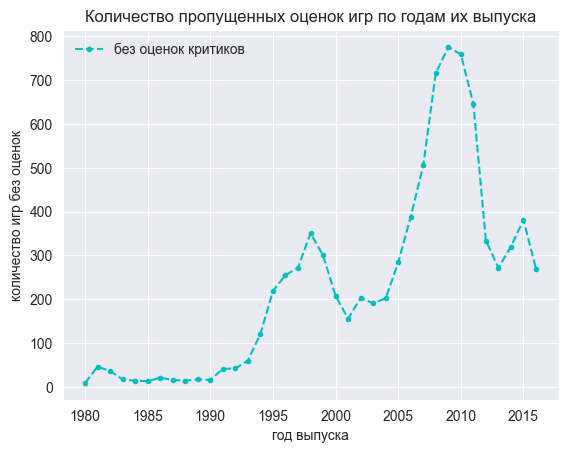

In [133]:
fig, ax = plt.subplots()
ax.set(title='Количество пропущенных оценок игр по годам их выпуска',
       xlabel='год выпуска', ylabel='количество игр без оценок')
ax.plot(critscore_nan_year['year_of_release'], critscore_nan_year['name'], '.--c', label='без оценок критиков')
ax.grid=True
ax.legend(frameon=False)
plt.show()

In [134]:
# Функция для получения медианы оценок критиков по разным платформам для игры
# row - (Series) Строка из набора данных
# возвращает - (int) Медиана оценок критиков для игры по разным платформам
def get_critic_score_median(row):
    return data[
        (data.index != row.name) &
        (data['name'] == row['name']) &
        (data['critic_score'].isnull() == False)
    ]['critic_score'].median()

In [135]:
# Проверка того, что оценки игры критиками для разных платформ отличаются незначительно (на основе медианы)
duplicated_data['critic_score_median'] = duplicated_data.apply(get_critic_score_median, axis=1)

print('Степень корреляции между медианами оценок критиков по разным платформам с реальными оценками -', duplicated_data['critic_score_median'].corr(duplicated_data['critic_score']))

Степень корреляции между медианами оценок критиков по разным платформам с реальными оценками - 0.8559952683154259


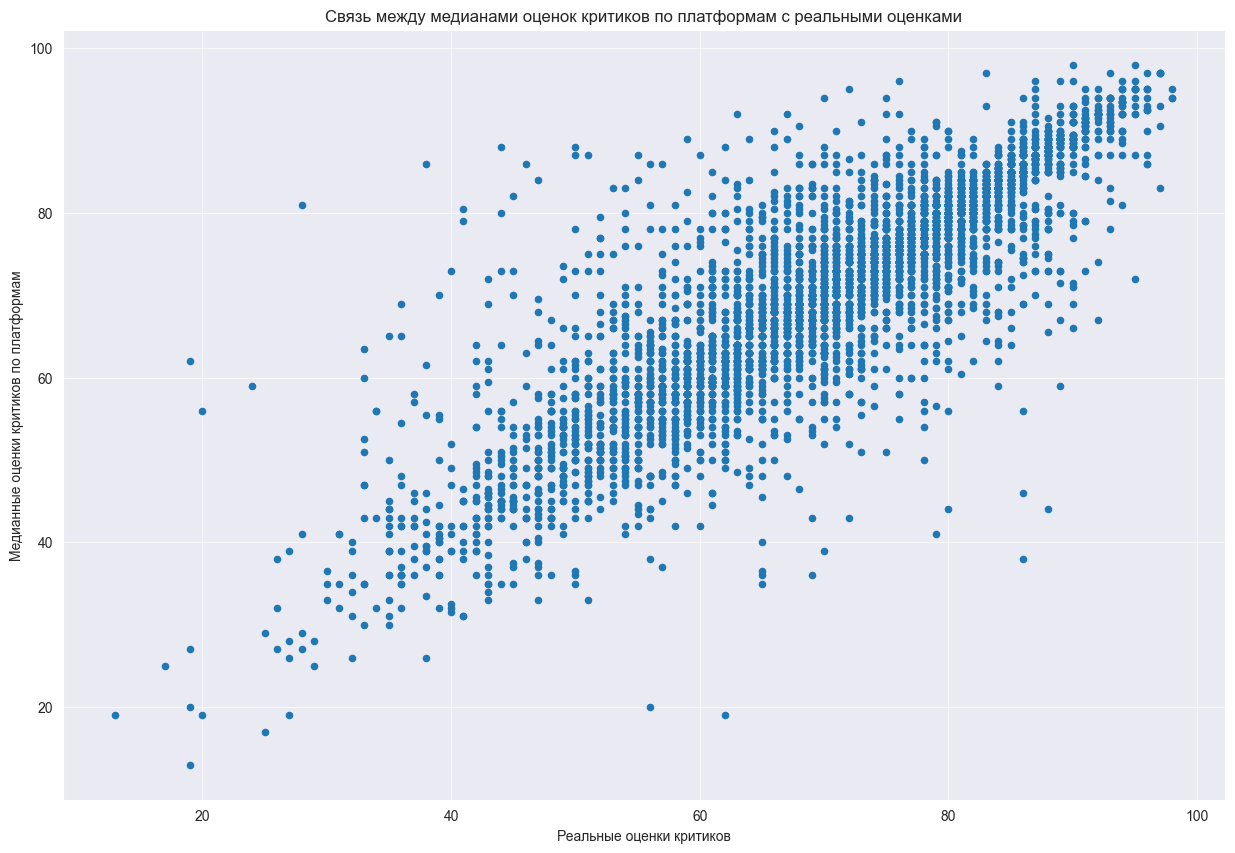

In [136]:
# Визуальная проверка того, что оценки игры критиками для разных платформ отличаются незначительно (на основе медианы)
duplicated_data.plot(kind='scatter', x='critic_score', y='critic_score_median', figsize=(15, 10))
plt.xlabel('Реальные оценки критиков')
plt.ylabel('Медианные оценки критиков по платформам')
plt.grid(linewidth=0.5)
plt.title('Связь между медианами оценок критиков по платформам с реальными оценками')
plt.show()

In [137]:
# Функция для получения среднего значения оценок критиков для игры по разным платформам
# row - (Series) Строка из набора данных
# возвращает - (int) Среднее значение оценок критиков для игры по разным платформам
def get_critic_score_mean(row):
    return data[
        (data.index != row.name) &
        (data['name'] == row['name']) &
        (data['critic_score'].isnull() == False)
    ]['critic_score'].mean()

In [138]:
# Проверка того, что оценки игры критиками для разных платформ отличаются незначительно (на основе среднего)
duplicated_data['critic_score_mean'] = duplicated_data.apply(get_critic_score_mean, axis=1)

print('Степень корреляции между средними значениями оценок критиков по разным платформам с реальными оценками -', duplicated_data['critic_score_mean'].corr(duplicated_data['critic_score']))

Степень корреляции между средними значениями оценок критиков по разным платформам с реальными оценками - 0.8567593629271477


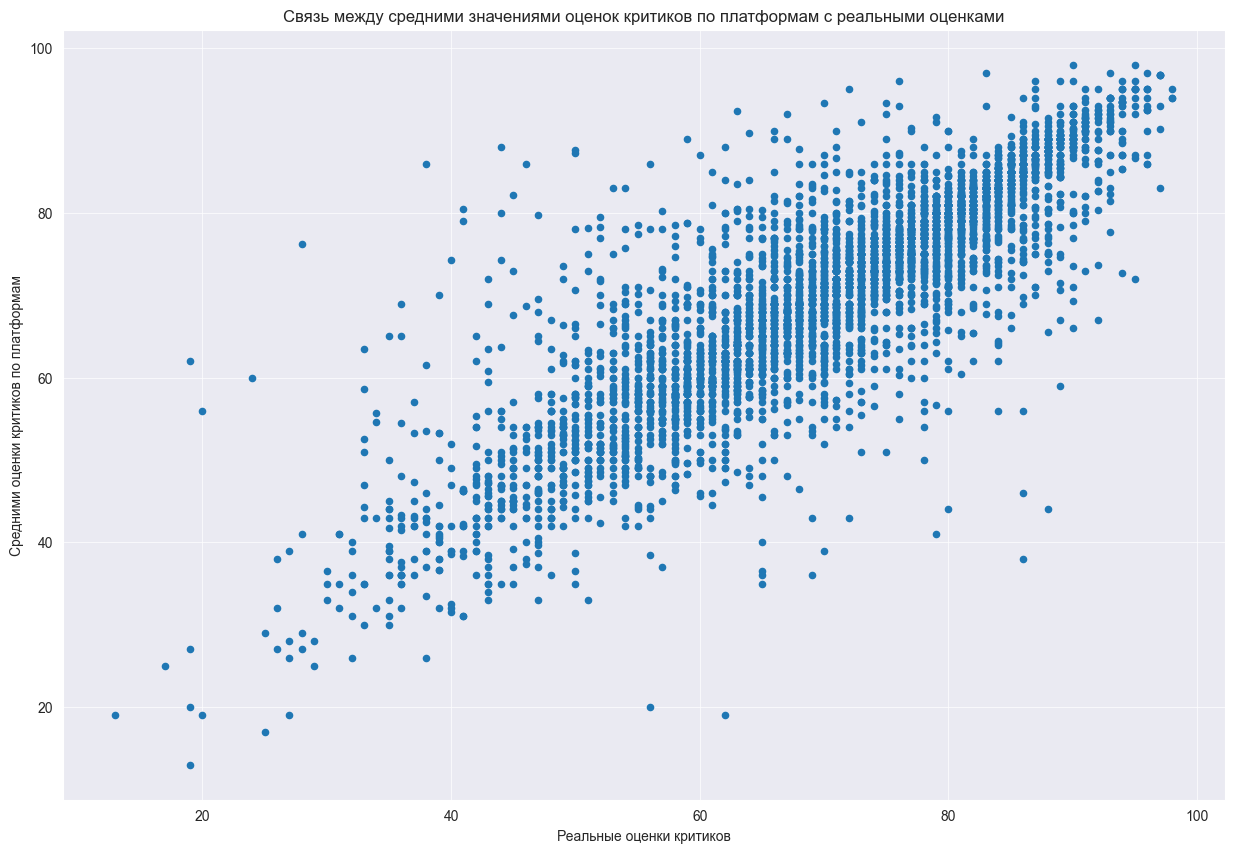

In [139]:
# Визуальная проверка того, что оценки игры критиками для разных платформ отличаются незначительно (на основе медианы)
duplicated_data.plot(kind='scatter', x='critic_score', y='critic_score_mean', figsize=(15, 10))
plt.xlabel('Реальные оценки критиков')
plt.ylabel('Cредними оценки критиков по платформам')
plt.grid(linewidth=0.5)
plt.title('Связь между средними значениями оценок критиков по платформам с реальными оценками')
plt.show()

In [140]:
# Заполнение пропусков на основе средних значений оценок игр критиками по платформам
data.loc[data['critic_score'].isnull(), 'critic_score'] = data[data['critic_score'].isnull()].apply(get_critic_score_mean, axis=1)

get_missing_values_proportion('critic_score')

Пропущенных значений - 7532 (45.46%)


### Проверка столбца user_score

В столбце `user_score` содержатся оценки, поэтому заменим на float64.
Но сразу это сделать не получится, так как кроме пропусков и значений содержится значения "tbd".
Эта аббревиатура обозначает "Будет определено", значит эти значения можно заменить на NaN.

In [141]:
# Проверка наличия нечисловых значений в столбце
data['user_score'].value_counts()

user_score
tbd    2394
7.8     324
8       288
8.2     279
8.3     253
       ... 
1.1       2
1.9       2
9.6       2
0         1
9.7       1
Name: count, Length: 96, dtype: int64

In [142]:
# Замена значений 'tbd' на NaN
data['user_score'].replace('tbd', np.NaN, inplace=True)

# Приведение к типу float
data['user_score'] = data['user_score'].astype('float')

data['user_score'].describe()

count    7540.000000
mean        7.125027
std         1.498254
min         0.000000
25%         6.400000
50%         7.500000
75%         8.200000
max         9.700000
Name: user_score, dtype: float64

In [143]:
get_missing_values_proportion('user_score')

Пропущенных значений - 9027 (54.49%)


In [144]:
# Визуальная оценка записей с пропущенными значениями в столбце user_score
data[data['user_score'].isnull()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
9,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN
10,Nintendogs,DS,2005,Simulation,9.05,10.95,1.93,2.74,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


In [145]:
userscore_nan_year = (data
                          .loc[data['user_score'].isna()==True]
                          .pivot_table(index='year_of_release', values='name', aggfunc='count')
                          .reset_index()
                     )

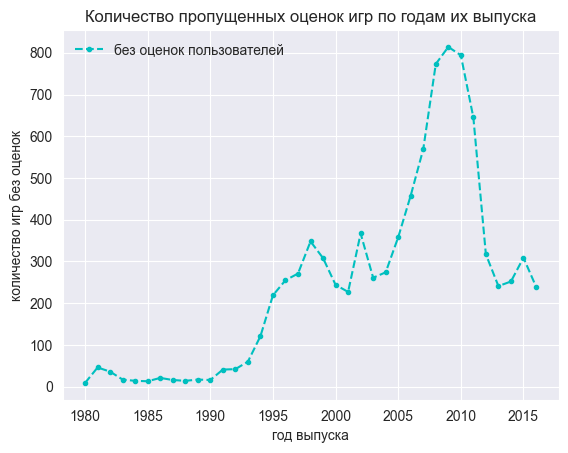

In [146]:
fig, ax = plt.subplots()
ax.set(title='Количество пропущенных оценок игр по годам их выпуска',
       xlabel='год выпуска', ylabel='количество игр без оценок')
ax.plot(userscore_nan_year['year_of_release'], userscore_nan_year['name'], '.--c', label='без оценок пользователей')
ax.grid=True
ax.legend(frameon=False)
plt.show()

Степень корреляции оценок пользователей и критиков - 0.5476337201251155


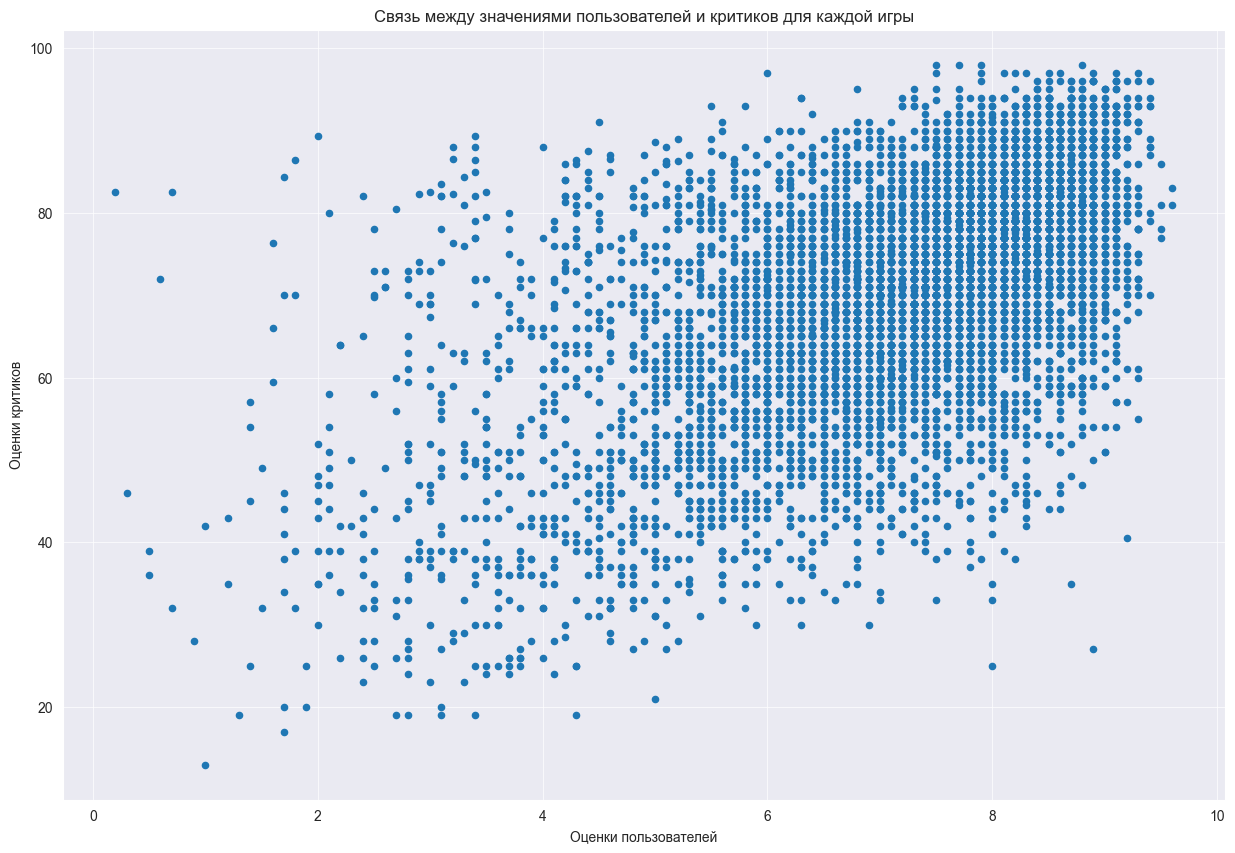

In [147]:
# Проверка  наличия связи между оценками пользователей и критиков
print('Степень корреляции оценок пользователей и критиков -', data['critic_score'].corr(data['user_score']))

data.plot(kind='scatter', x='user_score', y='critic_score', figsize=(15, 10))
plt.xlabel('Оценки пользователей')
plt.ylabel('Оценки критиков')
plt.grid(linewidth=0.5)
plt.title('Связь между значениями пользователей и критиков для каждой игры')
plt.show()

In [148]:
# Функция для получения медианы оценок пользователей по разным платформам для игры
# row - (Series) Строка из набора данных
# возвращает - (int) Медиана оценок пользователей для игры по разным платформам
def get_user_score_median(row):
    return data[
        (data.index != row.name) &
        (data['name'] == row['name']) &
        (data['user_score'].isnull() == False)
    ]['user_score'].median()

In [149]:
# Сброс DataFrame с играми которые есть  на разных платформах - необходимо для работы со столбцом user_score после замены значений 'tbd'
duplicated_data = data[data['name'].isin(data[data['name'].duplicated()]['name'].unique())].copy()

duplicated_data.sort_values(by='name')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
3358,Frozen: Olaf's Quest,3DS,2013,Platform,0.27,0.27,0.00,0.05,NaN,NaN,NaN
3862,Frozen: Olaf's Quest,DS,2013,Platform,0.21,0.26,0.00,0.04,NaN,NaN,NaN
3120,007: Quantum of Solace,Wii,2008,Action,0.29,0.28,0.01,0.07,54.0,7.5,T
1285,007: Quantum of Solace,X360,2008,Action,0.82,0.51,0.01,0.14,65.0,7.1,T
14658,007: Quantum of Solace,PC,2008,Action,0.01,0.01,0.00,0.00,70.0,6.3,T
...,...,...,...,...,...,...,...,...,...,...,...
2583,pro evolution soccer 2011,PSP,2010,Sports,0.05,0.30,0.29,0.16,74.0,5.8,E
7149,pro evolution soccer 2011,Wii,2010,Sports,0.07,0.10,0.03,0.02,78.0,5.4,E
3304,pro evolution soccer 2011,X360,2010,Sports,0.09,0.44,0.00,0.07,79.0,5.9,E
8280,uDraw Studio: Instant Artist,Wii,2011,Misc,0.06,0.09,0.00,0.02,54.0,NaN,E


In [150]:
# Проверка того, что оценки игры пользователями для разных платформ отличаются незначительно (на основе медианы)
duplicated_data['user_score_median'] = duplicated_data.apply(get_user_score_median, axis=1)

print('Степень корреляции между медианами оценок пользователей по разным платформам с реальными оценками -', duplicated_data.query('user_score.isnull() == False')['user_score_median'].corr(duplicated_data.query('user_score.isnull() == False')['user_score']))

Степень корреляции между медианами оценок пользователей по разным платформам с реальными оценками - 0.6389454008292249


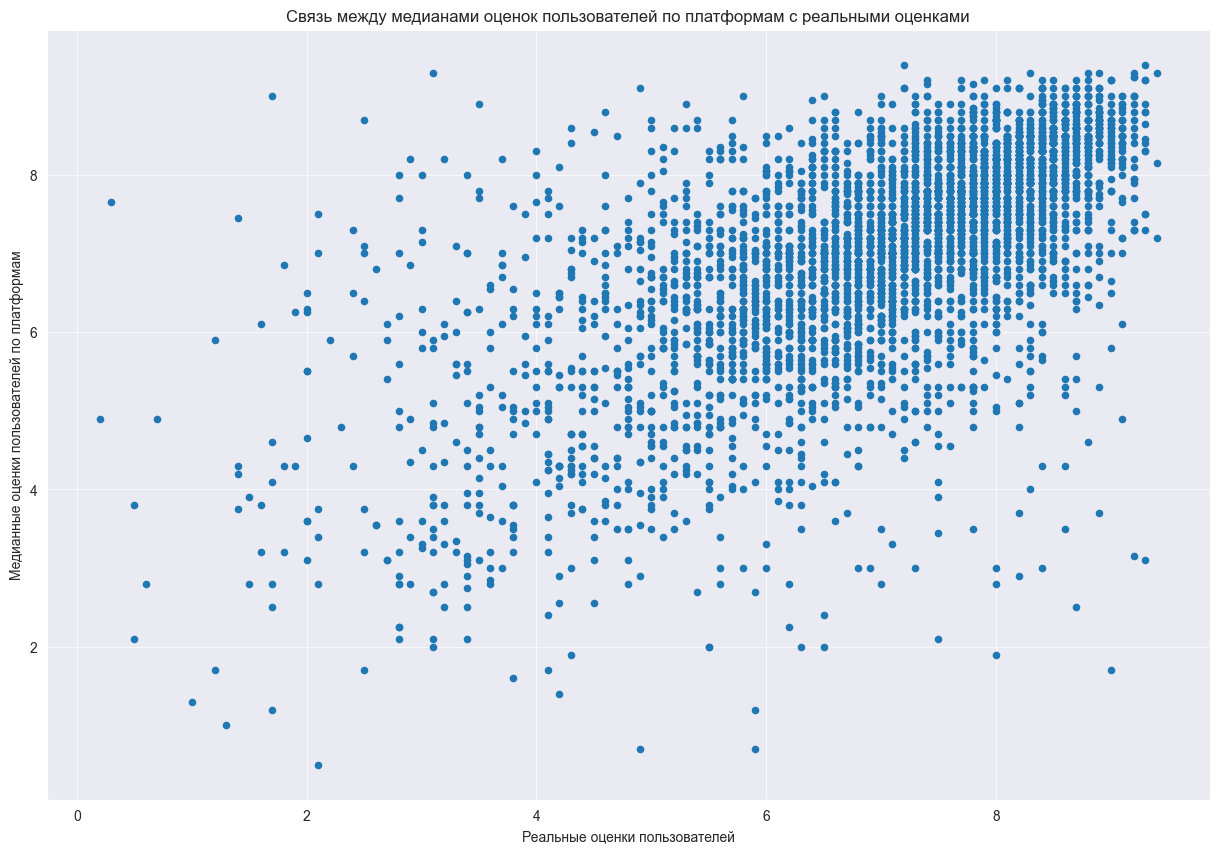

In [151]:
# Визуальная проверка того, что оценки игры пользвателями для разных платформ отличаются незначительно (на основе медианы)
duplicated_data.plot(kind='scatter', x='user_score', y='user_score_median', figsize=(15, 10))
plt.xlabel('Реальные оценки пользователей')
plt.ylabel('Медианные оценки пользователей по платформам')
plt.grid(linewidth=0.5)
plt.title('Связь между медианами оценок пользователей по платформам с реальными оценками')
plt.show()

In [152]:
# Функция для получения среднего значения оценок пользователей для игры по разным платформам
# row - (Series) Строка из набора данных
# возвращает - (int) Среднее значение оценок пользователей для игры по разным платформам
def get_user_score_mean(row):
    return data[
        (data.index != row.name) &
        (data['name'] == row['name']) &
        (data['user_score'].isnull() == False)
    ]['user_score'].mean()

In [153]:
# Проверка гипотезы о том, что оценки игры пользователями для разных платформ отличаются незначительно (на основе среднего)
duplicated_data['user_score_mean'] = duplicated_data.apply(get_user_score_mean, axis=1)

print('Степень корреляции между средними значениями оценок пользователей по разным платформам с реальными оценками -', duplicated_data['user_score_mean'].corr(duplicated_data['user_score']))

Степень корреляции между средними значениями оценок пользователей по разным платформам с реальными оценками - 0.6471184339147852


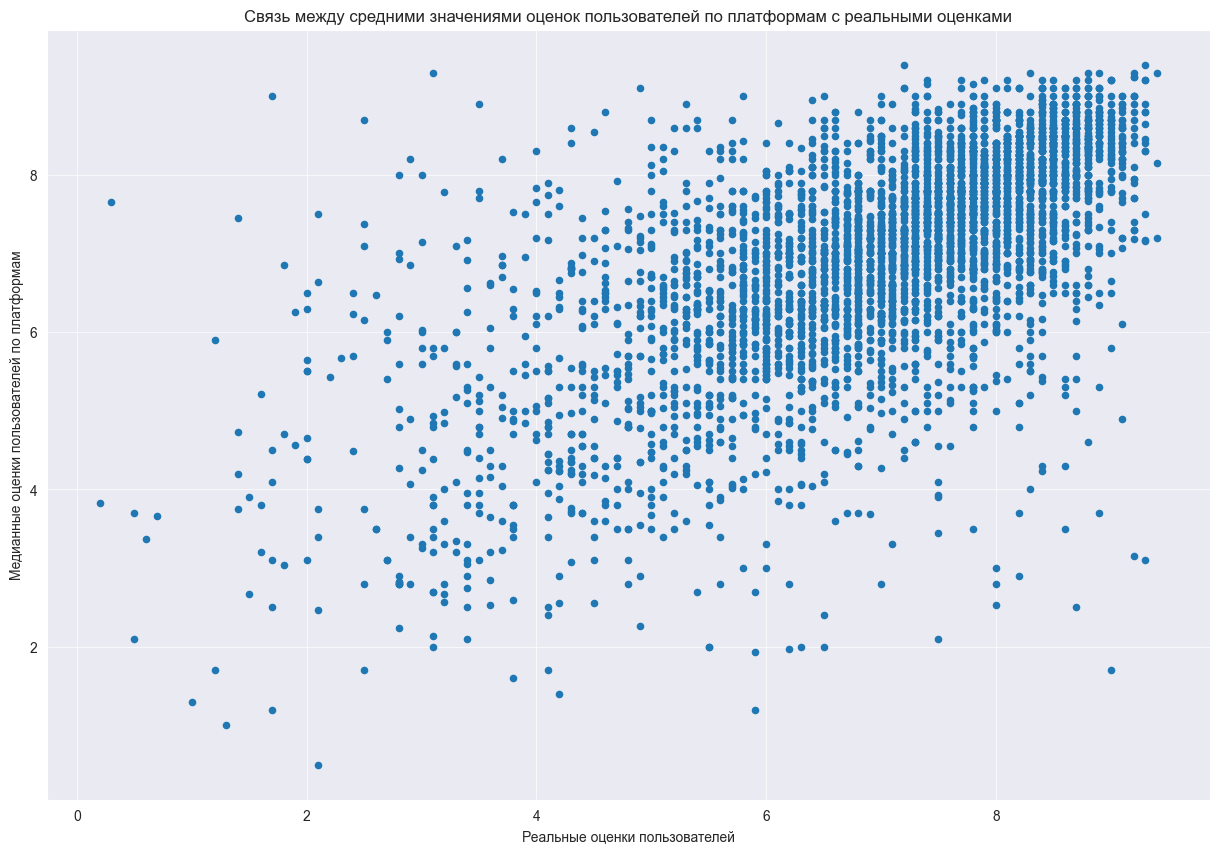

In [154]:
# Визуальная проверка гипотезы о том, что оценки игры пользователями для разных платформ отличаются незначительно (на основе медианы)
duplicated_data.plot(kind='scatter', x='user_score', y='user_score_mean', figsize=(15, 10))
plt.xlabel('Реальные оценки пользователей')
plt.ylabel('Медианные оценки пользователей по платформам')
plt.grid(linewidth=0.5)
plt.title('Связь между средними значениями оценок пользователей по платформам с реальными оценками')
plt.show()

### Заполнение пропусков в столбце rating

In [155]:
rating_nan_year = (data
                        .loc[data['rating'].isna()==True]
                        .pivot_table(index='year_of_release', values='name', aggfunc='count')
                        .reset_index()
                     )

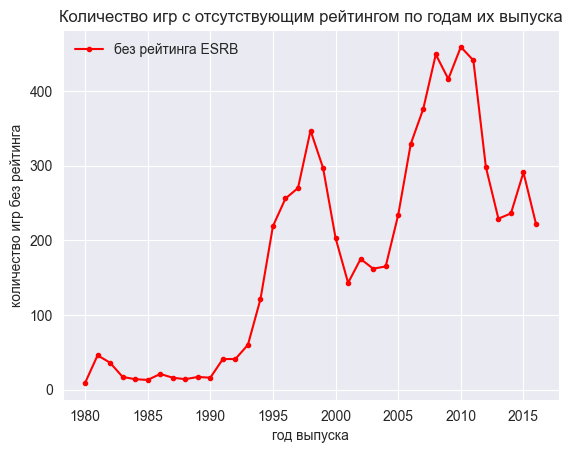

In [156]:
fig, ax = plt.subplots()
ax.set(title='Количество игр с отсутствующим рейтингом по годам их выпуска',
       xlabel='год выпуска', ylabel='количество игр без рейтинга')
ax.plot(rating_nan_year['year_of_release'], rating_nan_year['name'], '.-r', label='без рейтинга ESRB')
ax.grid=True
ax.legend(frameon=False)
plt.show()

Наблюдаем ту же динамику количества игр без рейтинга, что и количества игр без оценок. Соответственно, и причины пропусков в данных могут быть теми же.

Посмотрим, что можно сделать с пропусками.

In [157]:
data['rating'].value_counts()

rating
E       3958
T       2930
M       1554
E10+    1412
EC         8
K-A        3
RP         2
AO         1
Name: count, dtype: int64

In [158]:
get_missing_values_proportion('rating')

Пропущенных значений - 6699 (40.44%)


Расшифровка категорий:
«EC» («Early childhood») — «Для детей младшего возраста»
«E» («Everyone») — «Для всех»
«K-A» («Kids to Adults»)— «Для детей и взрослых»
«E10+» («Everyone 10 and older») — «Для всех от 10 лет и старше»
«T» («Teen») — «Подросткам»
«M» («Mature») — «Для взрослых»
«AO» («Adults Only 18+») — «Только для взрослых»
«RP» («Rating Pending») — «Рейтинг ожидается»

Так как значний в `ec`, `k-a`, `rp` и `ao` очень мало, сократим количество категорий.
Объединим:
`ec` - `e`
`k-a` - `e`
`ao` - `m`
`rp` - значит «Рейтинг ожидается», заменим на NaN

In [159]:
data['rating'] = data['rating'].replace('EC', 'E')
data['rating'] = data['rating'].replace('K-A', 'E')
data['rating'] = data['rating'].replace('AO', 'M')
data.loc[data['rating'] == 'RP', 'rating'] = np.nan
data['rating'].value_counts()

rating
E       3969
T       2930
M       1555
E10+    1412
Name: count, dtype: int64

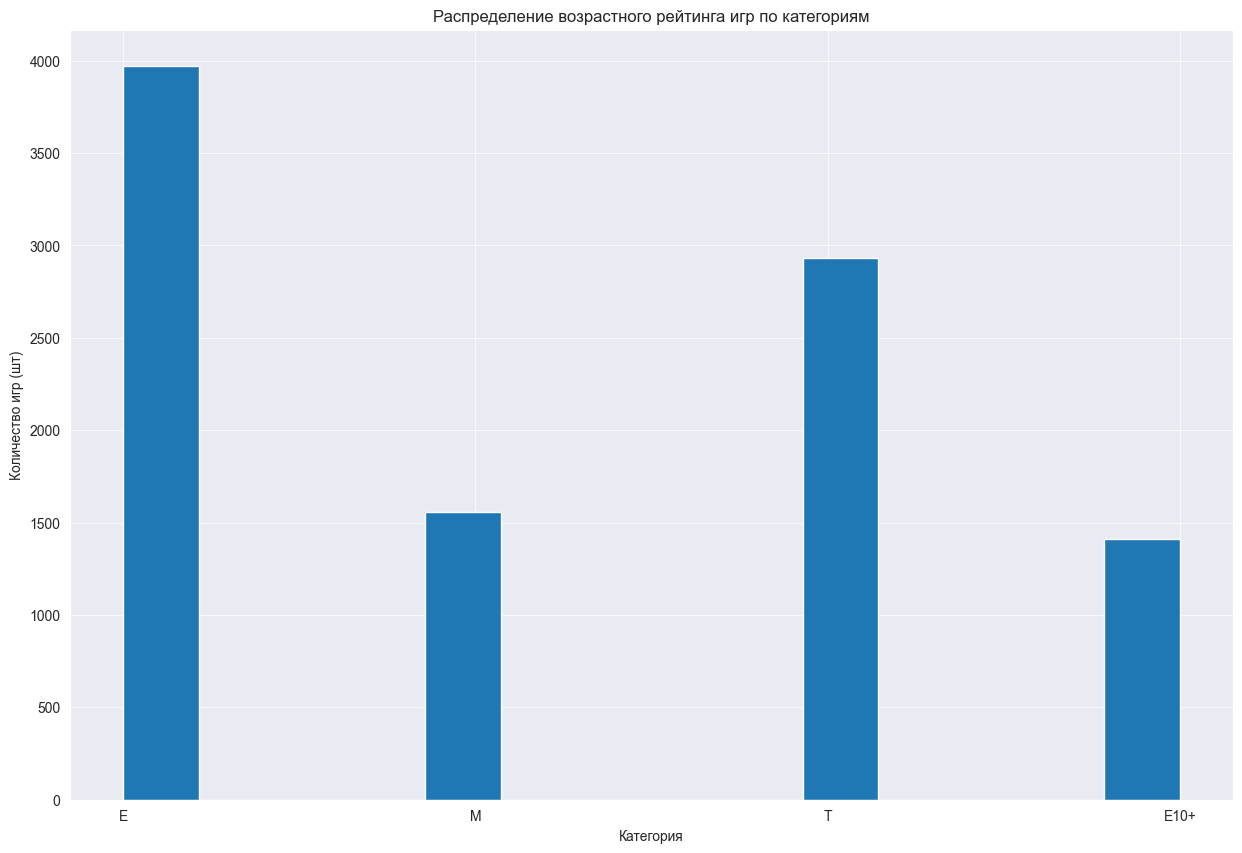

In [160]:
data['rating'].hist(bins=14, figsize=(15, 10))
plt.xlabel('Категория')
plt.ylabel('Количество игр (шт)')
plt.grid(linewidth=0.5)
plt.title('Распределение возрастного рейтинга игр по категориям')
plt.show()

In [161]:
get_missing_values_proportion('rating')

Пропущенных значений - 6701 (40.45%)


In [162]:
# Функция для получения моды возрастного рейтинга по разным платформам для игры
# row - (Series) Строка из набора данных
# возвращает - (int) Мода возрастного рейтинга по разным платформам для игры
def get_rating_mode(row):
    mode = data[
        (data.index != row.name) &
        (data['name'] == row['name']) &
        (data['rating'].isnull() == False)
    ]['rating'].mode()
    
    if len(mode) == 0:
        return np.NaN
    
    return mode[0]

In [163]:
# Заполнение пропусков на моды возрастного рейтинга игр по платформам
data.loc[data['rating'].isnull(), 'rating'] = data[data['rating'].isnull()].apply(get_rating_mode, axis=1)

get_missing_values_proportion('rating')

Пропущенных значений - 6263 (37.80%)


У нас имеется около 38% с пропущенными значениями рейтинга. Это значительная величина. Мы не можем удалить строки, так как потеряем большой объём данных. Оставим так как есть

## Расчет суммарных продаж во всех регионах

In [164]:
data['sum_sales'] = data['na_sales'] + data['eu_sales'] + data['jp_sales'] + data['other_sales']

data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sum_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,31.38


In [165]:
print('Количество игр с суммарными продажами, равными 0 - {}'.format(len(data.query('sum_sales == 0'))))

Количество игр с суммарными продажами, равными 0 - 2


## Выводы (шаг 2)

Названия всех столбцов были приведены к нижнему регистру.<br /><br />

__Обработка пропусков и замена типа данных в столбцах__

В столбце __name__ и __genre__ удалено 2 пропуска ввиду невозможности их восстановления и малого количества. Предположительно, данные пропуски появились ввиду некорректного считывая имени из первоисточника.

В столбце __year_of_release__ было обнаружен 269 (1.69% всех записей) пропусков. Предположительно, данные пропуски появились ввиду отсутствия данных в первоисточнике. 123 пропусков были заполнены, основываясь на том, что одна игра на разных платформах чаще всего выходит в один год (корреляция моды года выпуска одной игры для разных платформ с реальным годом выпуска у имеющихся значений на уровне 0.89). Оставшиеся 146 (0.83%) записей с пропусками были удалены ввиду их незначительного количества. Столбец был преобразован к целочисленному типу с целью экономии памяти.

В столбцах __na_sales__, __eu_sales__, __jp_sales__ и __other_sales__ было обнаружено, что значительное количество значений, равнo 0, скорее всего это является следствием
- округления значений до 10 тыс. в меньшую сторону и значительного количества игр с продажами на сумму менее &#0036;10 тыс. в конкретном регионе;
- отсутсвтия продаж у игры в конкретном регионе (это подтверждается тем, что только у 2 игр суммарные продажи во всех регионах равны 0).


В столбцах __critic_score__ и __user_score__ было обнаружено 8578 (51.32% всех записей) и 6701 (40.09% всех записей) пропусков, соответственно.
- В столбце __user_score__ также присутствовали значения "tbd", которые расшифровываются как "to be determined". Для игр с такой оценкой не хватает пользовательских оценок. Эти значения были заменены на NaN.

В столбце __critic_score__ было заполнено 961 пропусков основываясь на том, что одна игра на разных платформах чаще всего имеет схожую оценку критиков (корреляция среднего значения оценки критиков одной игры для разных платформ с реальной оценкой у имеющихся значений на уровне 0.86). Пользовательские оценки заполнить, основываясь на этом же предположении, не удалось, так как оказалось, что оценки одной игры на разных платформах могут значительно отличаться (корреляция на уровне 0.63). Предположительно, это обусловлено тем, что при оценке игры критики в меньшей степени обращают внимание на такие аспекты, как графическая составляющая игры, оптимизация и т.п. Но данная гипотеза требует проверки в отдельном исследовании. Оставшиеся пропуски в столбцах не подлежат заполнению ввиду отсутствия каких-либо источников для этого. Удаление этих данных также не допустимо ввиду их значительного количества.

Исходя из графиков, описывающих какая часть игр за каждый год не имеет оценок можно сделать следующие выводы:
- графики описывающие оценки критиков и пользователей практически идентичны;
- предположительно, отсутствие оценок связано с ростом количества игр. Возможно с ростом числа игр, у критиков нет возможности писать обзоры на все из них. Кроме того пользователи обычно играют только на одной платформе. Но данная гипотеза требует проверки в отдельном исследовании.

В столбце __rating__ 3 записи имели значение "K-A" и были заменены на современный вариант данного типа рейтинга - "E". Также было обнаружено 6766 (40.48% всех записей) пропусков. Пропуски в данных обусловлены теми же причинами, что и пропуски в оценках игр. 435 пропусков было устранено путем объединения малочисленных категорий, а также основываясь на том, что одна игра на разных платформах должна иметь одинаковый возрастной рейтинг. Оставшиеся пропуски в столбцах не подлежат заполнению ввиду отсутствия каких-либо источников для этого. Удаление этих данных также не допустимо ввиду их значительного количества.<br /><br />

Во время обработки пропусков была обнаружена тенденция: количество игр, для которых нет оценки критиков по годам выпуска практически соответствовало количеству игр, для которых нет оценки пользователей, и количеству игр, для которых нет рейтинга от организации ESRB. Характерная динамика показателей может быть связана с тем, что игр стало выходить больше - соответственно, пользователи не имели возможности оценить все из них. Также появилось большее количество платформ, а большинство пользователей имеют возможность поиграть только на одной из платформ. Кроме того, критики и ESRB, вероятно, оценивают и выставляют рейтинг не каждой вышедшей игру, а наиболее ожидаемые и пользующиеся спросом игры, либо игре в целом - только на одной из платформ

Также часть пропусков за последние годы связана с показателем tbd (to be determined): игра была оценена, но система не посчитала рейтинг на момент выгрузки данных (рейтинг по оценке пользователей будет представлен позже).

Также были рассчитаны суммарные продажи во всех регионах для каждой игры.

# Шаг 3. Исследовательский анализ данных

## Cколько игр выпускалось в разные годы

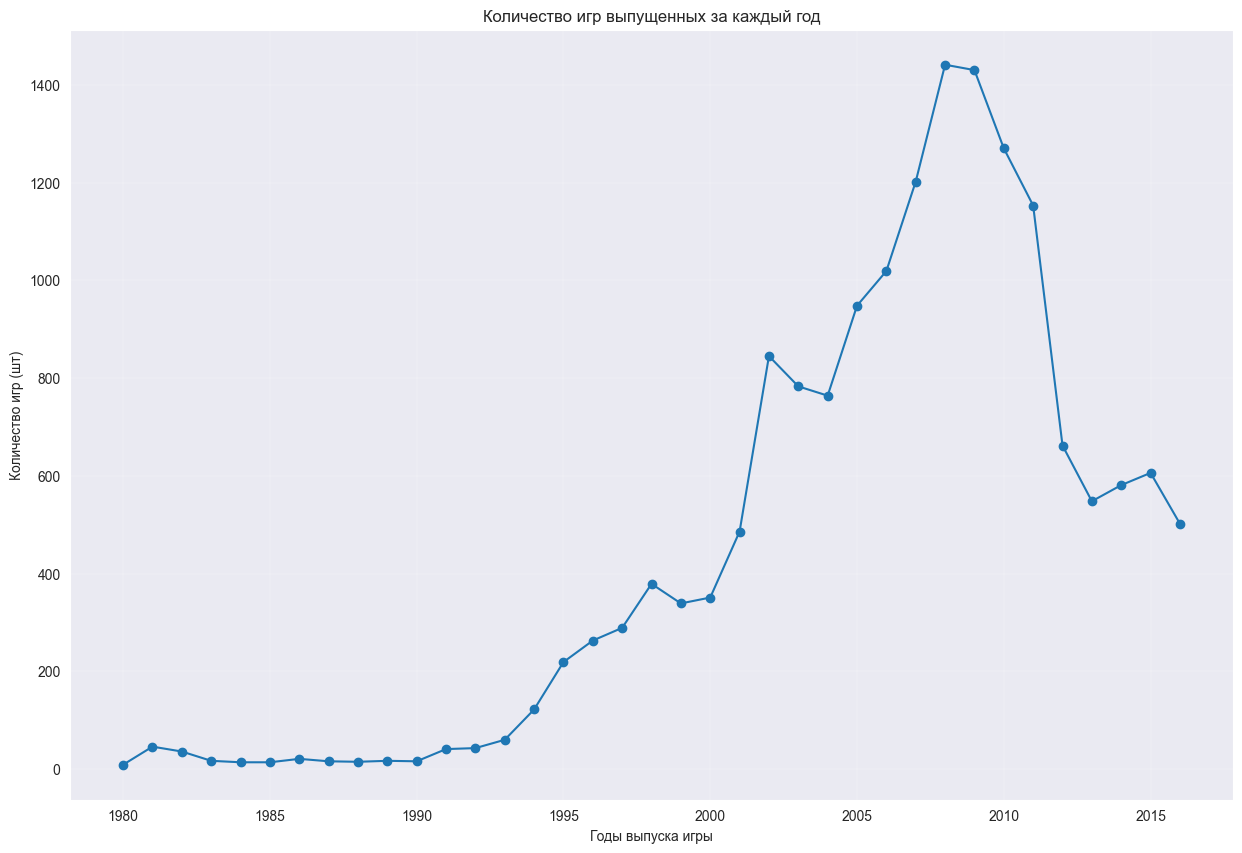

In [166]:
data.groupby('year_of_release')['name'].count().plot(style='o-', figsize=(15, 10))
plt.xlabel('Годы выпуска игры')
plt.ylabel('Количество игр (шт)')
plt.grid(linewidth=0.2)
plt.title('Количество игр выпущенных за каждый год')
plt.show()

Заметим, что в данных очень мало игр, выпущенных с 1980 по 1990 годы. С 1990 по 2000 гг. представлено больше игр, но основной объём информации приходится на игры, вышедшие с 2000 по 2016 гг.

Таким образом, у нас имеется "хвост данных", который следует отбросить - это период до 1994 года: данные за этот период незначительные, а значит, непоказательные.

## Как менялись продажи игр по платформам

Найдём ТОП платформ с наибольшими суммарными продажами.

In [167]:
platform_popular = (data
                        .pivot_table(index='platform', values='sum_sales', aggfunc='sum')
                        .reset_index()
                        .sort_values(by='sum_sales', ascending=False)
                        .head(10)
                        .reset_index(drop=True)
                   )
platform_popular

,platform,sum_sales
0,PS2,1247.16
1,X360,966.61
2,PS3,935.19
3,Wii,903.31
4,DS,804.28
5,PS,727.58
6,PS4,314.14
7,GBA,313.73
8,PSP,293.57
9,PC,258.86


Исходя из распределения продаж игр по платформам можно сделать вывод, что платформами с наибольшим количеством продаж (более $700 млн для каждой платформы) являются - Nintendo DS и Wii, Sony PlayStation 1, 2 и 3 и Microsoft Xbox 360.

In [168]:
# Создадим список с названием платформ из ТОП
platforms = platform_popular['platform'].head(6)

platforms

0     PS2
1    X360
2     PS3
3     Wii
4      DS
5      PS
Name: platform, dtype: object

Построим и изучим распределение суммарных продаж по годам для каждой из TOP платформ.

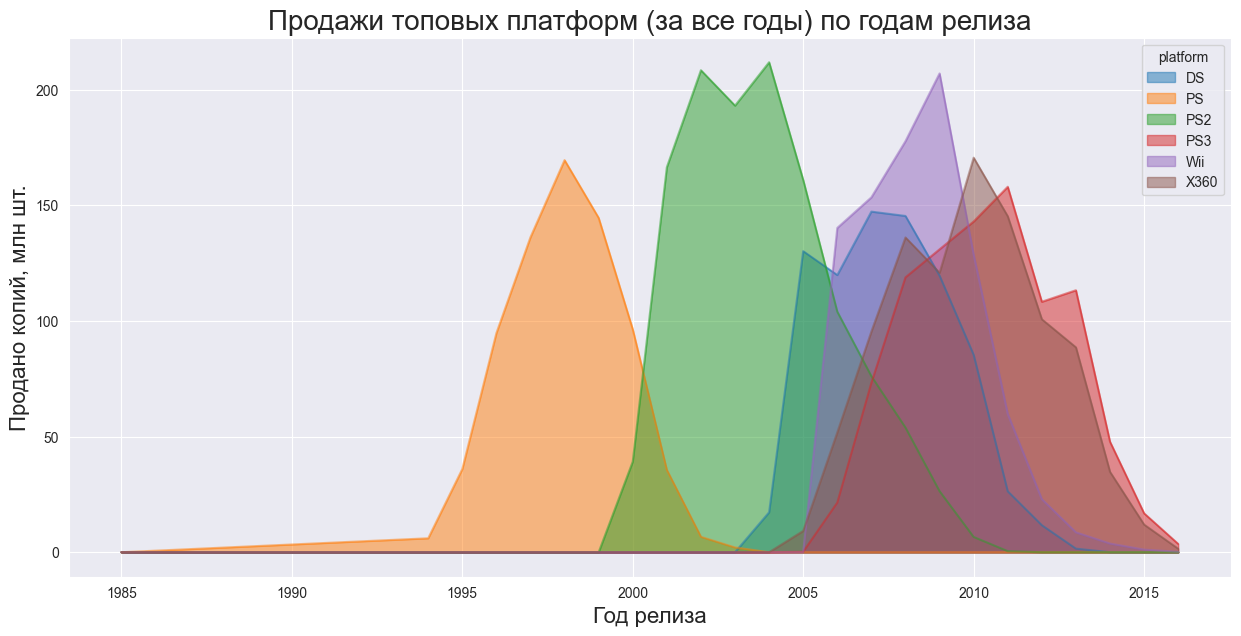

In [169]:
data.query('platform in @platforms').pivot_table(index = 'year_of_release', columns = 'platform', values= 'sum_sales', aggfunc = 'sum').plot.area(stacked=False, figsize=(15, 7))
plt.title('Продажи топовых платформ (за все годы) по годам релиза', fontsize=20)
plt.ylabel('Продано копий, млн шт.', fontsize=16)
plt.xlabel('Год релиза', fontsize=16);

В разные годы были популярны (и соответственно, приносили доход) игры на разных платформах. Игры на Playstation набирали популярность с 1994 года, достигли пика по продажам в 1990 году и "сошли на нет" в 2002-2003 годах. На замену таким играм в 2000 году пришли игры на Playstation2, достаточно долго (с 2001 по 2005 гг.) лидируя на рынке игр по продажам. На их смену пришли игры на карманных консолях DS, которые с 2004 года набрали моментальную популярность в 2005-2010 гг. Практически в то же время (с 2006 по 2010 гг. с пиком в 2009 г.) были популярны игры на платформе Wii (с самой малоразмерной на тот момент приставкой Nintendo Wii). В те же годы на смену Playstation2 пришли игры на платформе Playstation3, которые продавались максимально хорошо в 2008-2013 гг. Вместе с Playstation3 в те же годы были популярны игры на Xbox360.

Из всех этих платформ самой продаваемой по сумме продаж являлась Playstation2. На тот момент у неё не было конкурентоспособных аналогов, она в течение долгого времени занимала топовые позиции. Второе и третье места делят между собой Xbox360, Playstation3, DS и Wii: игры на этих платформах были популярны в одни и те же годы, и предпочтения потребителей игр разделились между ними. Отдельно отметим Playstation - игры на этой платформе выходили в ранние годы, и на тот момент не наблюдалось конкурентоспособных аналогов.

Примерный срок, за который устаревает платформа, составляет около 8-10 лет. Также следует отметить, что со временем стало появляться больше конкурентоспособных платформ, способных занять нишу и привлечь свою категорию потребителей.

Исходя из анализа количества выпущенных игр по годам и анализа продаж по платформам, продажа игр на которых приносит наибольший доход, можем сделать вывод о том, что период до 1994 года не является актуальным для анализа. До 1994 года выходило слишком мало игр, относительно общей выборки; а также не наблюдалось лидирующих по суммарным продажам платформ. Более того, только за последние 10 лет мы наблюдаем и большое количество игр, и большой выбор платформ, которые могут составить друг-другу конкуренцию. Поскольку последние тенденции показывают лидерство нескольких платформ, а также срок устаревания платформы составляет около 10 лет; и данные за 2016 год неполные, нам нужен срез данных с 2006 по 2015 год, с которым мы продолжим пока работать.

## Отделение данных за актуальный период

In [170]:
games_actual = data.query('year_of_release >= 2006 & year_of_release <= 2015')

Тем не менее,  нам нужны платформы, которые находятся на подъеме, а значит стоит рассматривать период равный примерно половине жизненного цикла. Иначе нам будут мешать платформы, которые набрали большие продажи в прошле годы, но уже на спаде и скоро перестанут выпускаться. Для определения такого периода изучим данные глубже.

Составим сводную таблицу, которая проиллюстрирует динамику лидерства платформ по продажам.

In [171]:
platform_dynam = games_actual.pivot_table(index='platform', columns='year_of_release', values='sum_sales', aggfunc='sum')
platform_dynam

year_of_release,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
platform,,,,,,,,,,
3DS,NaN,NaN,NaN,NaN,0.30,63.20,51.76,56.57,43.76,27.78
DC,NaN,0.02,0.04,NaN,NaN,NaN,NaN,NaN,NaN,NaN
DS,119.81,147.23,145.36,119.56,85.35,26.33,11.67,1.54,NaN,NaN
GBA,5.46,3.40,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
GC,11.55,0.27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
PC,2.85,9.28,12.46,17.05,26.15,35.16,23.45,13.01,13.28,8.52
PS2,103.99,76.10,53.90,26.40,6.59,0.45,NaN,NaN,NaN,NaN
PS3,21.44,73.19,118.79,130.93,142.96,157.98,108.28,113.25,47.76,16.82
PS4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,25.99,100.00,118.90


Удалим из анализа уже устаревшие платформы (те, для которых уже нет данных в 2015 году) и платформы, которые устареют в 2017 году (те, для которых есть данные ранее 2007 года).

In [172]:
platform_dynam = platform_dynam.loc[platform_dynam[2006].isna()==True].copy()
platform_dynam.dropna(subset = [2015], inplace = True)
platform_dynam

year_of_release,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
platform,,,,,,,,,,
3DS,NaN,NaN,NaN,NaN,0.3,63.20,51.76,56.57,43.76,27.78
PS4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,25.99,100.00,118.90
PSV,NaN,NaN,NaN,NaN,NaN,4.63,16.19,10.59,11.90,6.25
WiiU,NaN,NaN,NaN,NaN,NaN,NaN,17.56,21.65,22.03,16.35
XOne,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.96,54.07,60.14


Таким образом, мы получили срез из 5 платформ, которые будут актуальны в 2017 году.

In [173]:
platform_dynam.drop([2006, 2007, 2008, 2009, 2010], axis='columns', inplace=True)
platform_dynam

year_of_release,2011,2012,2013,2014,2015
platform,,,,,
3DS,63.20,51.76,56.57,43.76,27.78
PS4,NaN,NaN,25.99,100.00,118.90
PSV,4.63,16.19,10.59,11.90,6.25
WiiU,NaN,17.56,21.65,22.03,16.35
XOne,NaN,NaN,18.96,54.07,60.14


## Какие платформы лидируют по продажам, растут или падают

Построим график для выделенных платформ.

C:\Users\som\Documents\Projects\studying_the_patterns_that_determine_the_success_of_game\venv\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\som\Documents\Projects\studying_the_patterns_that_determine_the_success_of_game\venv\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\som\Documents\Projects\studying_the_patterns_that_determine_the_success_of_game\venv\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\som\Documents\Pr

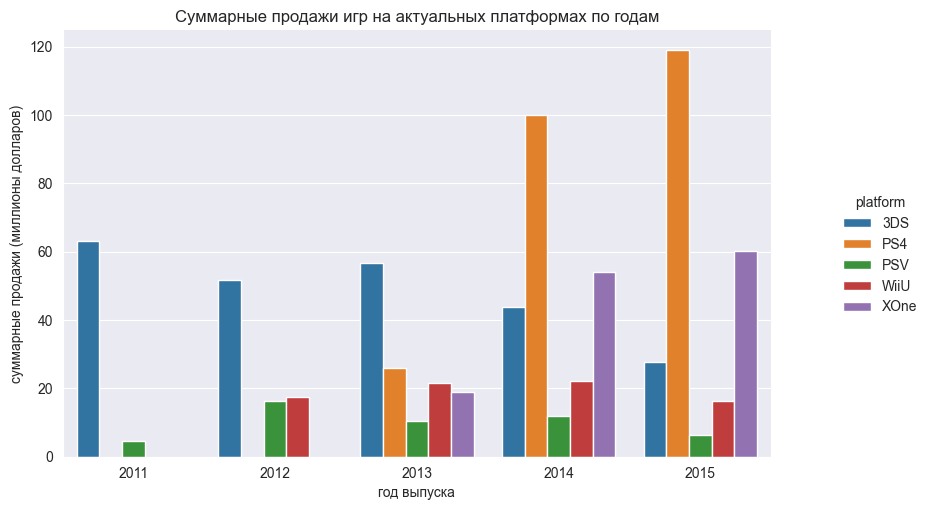

In [174]:
platform_dynam = (games_actual
                              .loc[(games_actual['platform'].isin(("3DS", "PS4", "PSV", "WiiU", "XOne"))==True) & (
                                  games_actual['year_of_release'].isin((2011, 2012, 2013, 2014, 2015))==True)]
                              .pivot_table(index=['platform', 'year_of_release'], values='sum_sales', aggfunc='sum')
                              .reset_index()
                 )
plot = sns.catplot(x='year_of_release', y='sum_sales', hue='platform', kind='bar', data=platform_dynam)
plt.title('Суммарные продажи игр на актуальных платформах по годам', fontsize=12)
plt.xlabel('год выпуска', fontsize=10)
plt.ylabel('суммарные продажи (миллионы долларов)', fontsize=10)
plot.fig.set_size_inches(10,5)

Таким образом, получили потенциально прибыльные в 2017 году платформы: 3DS, которая уже несколько лет пользуется популярностью у потребителей игр; Playstation4, только набирающая обороты и приносящая самый высокий доход от продаж; PlaystationVita, не настолько популярная (что может быть связано с меньшим количеством игр на данной платформе), но также потенциально прибыльная в ближайшие 2-3 года; WiiU, являющаяся преемником Wii, которая тоже была достаточно популярна в своё время; а также XBoxOne от компании Microsoft, способная составить конкуренцию Playstation4.

При этом наблюдается рост популярности у потребителей игр для Playstation4 и XBoxOne; и снижение спроса на игры на платформах 3DS, PlaystationVita и WiiU, тем не менее, даже они потенциально могут принести достаточно высокий доход до появления аналогов нового поколения.

## График «ящик с усами» по глобальным продажам каждой игры и разбивкой по платформам


Построим график «ящик с усами» по глобальным продажам игр в разбивке по платформам.

Оставим в срезе данных только игры, относящиеся к данным платформам

In [175]:
profitable_platforms = pd.Series(platform_dynam['platform'].unique())
games_popular = games_actual.loc[games_actual['platform'].isin(profitable_platforms)==True].reset_index(drop=True)
games_popular.head(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sum_sales
0,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,NaN,14.63
1,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,NaN,NaN,NaN,14.60
2,Mario Kart 7,3DS,2011,Racing,5.03,4.02,2.69,0.91,85.0,8.2,E,12.65
3,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62
4,Pokemon Omega Ruby/Pokemon Alpha Sapphire,3DS,2014,Role-Playing,4.35,3.49,3.10,0.74,NaN,NaN,NaN,11.68
5,Super Mario 3D Land,3DS,2011,Platform,4.89,3.00,2.14,0.78,90.0,8.4,E,10.81
6,New Super Mario Bros. 2,3DS,2012,Platform,3.66,3.14,2.47,0.63,78.0,7.2,E,9.90
7,Animal Crossing: New Leaf,3DS,2012,Simulation,2.03,2.36,4.39,0.39,88.0,8.7,E,9.17
8,FIFA 16,PS4,2015,Sports,1.12,6.12,0.06,1.28,82.0,4.3,E,8.58
9,Star Wars Battlefront (2015),PS4,2015,Shooter,2.99,3.49,0.22,1.28,NaN,NaN,NaN,7.98


In [176]:
# Создадим таблицу, необходимую для построения графиков, исключив ненужные столбцы
name_sale = games_popular.pivot_table(index=['platform', 'name'], values='sum_sales', aggfunc='sum').reset_index()
name_sale.head(10)

,platform,name,sum_sales
0,3DS,Fire Emblem Fates,1.67
1,3DS,Frozen: Olaf's Quest,0.59
2,3DS,12-Sai. Honto no Kimochi,0.07
3,3DS,50 Classic Games,0.01
4,3DS,7th Dragon III Code: VFD,0.16
5,3DS,A-Train: City Simulator,0.06
6,3DS,AKB48+Me,0.11
7,3DS,Ace Combat: Assault Horizon Legacy,0.25
8,3DS,Adventure Time: Explore the Dungeon Because I ...,0.14
9,3DS,Adventure Time: Finn & Jake Investigations,0.09


C:\Users\som\Documents\Projects\studying_the_patterns_that_determine_the_success_of_game\venv\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\som\Documents\Projects\studying_the_patterns_that_determine_the_success_of_game\venv\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\som\Documents\Projects\studying_the_patterns_that_determine_the_success_of_game\venv\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


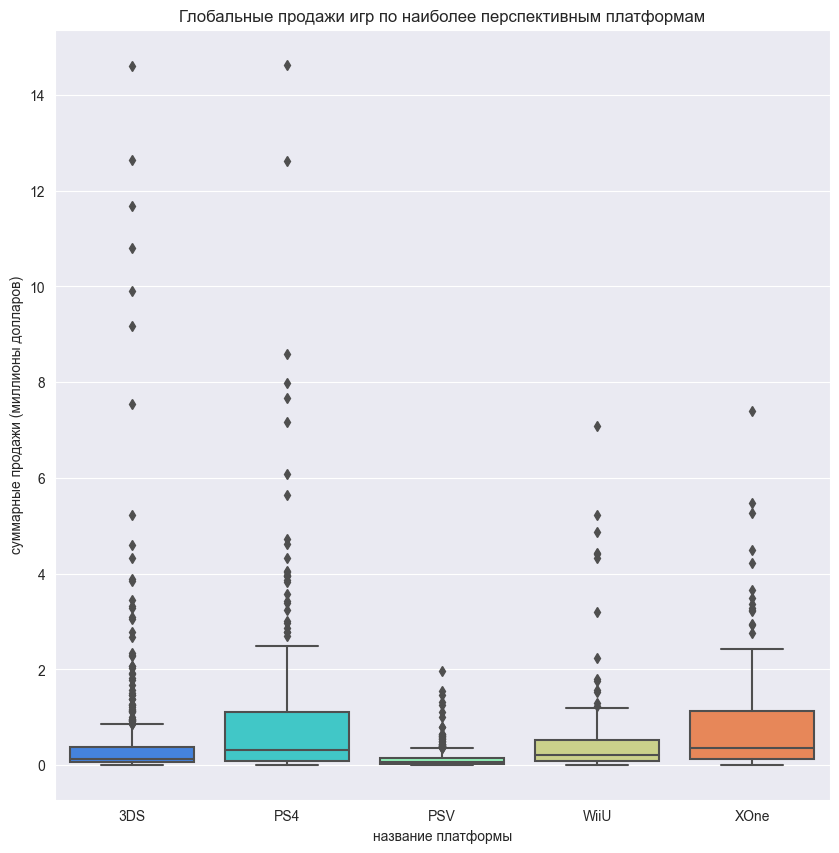

In [177]:
# Построим графики
plt.subplots(figsize=(10,10))
plt.title("Глобальные продажи игр по наиболее перспективным платформам")
sns.boxplot(x="platform", y="sum_sales", data=name_sale, palette='rainbow')
plt.xlabel('название платформы')
plt.ylabel('суммарные продажи (миллионы долларов)')
plt.show()

Видим, что на каждой из платформ существует большое количество игр, суммарные продажи по которым выбиваются из квартильных значений. В целом, разница в суммарных продажах игр в рамках каждой из платформ очень велико для 3DS и Playstation4; чуть меньше - для WiiU и XBoxOne; и относительно небольшая - для PlaystationVita.

Сравним показатели по наиболее часто встречающимся значениям: для этого нам интересны среднее, медианное и квартильные значения. Построим график в укрупнённом виде, исключив из визуализации выбивающиеся значения.

C:\Users\som\Documents\Projects\studying_the_patterns_that_determine_the_success_of_game\venv\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\som\Documents\Projects\studying_the_patterns_that_determine_the_success_of_game\venv\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\som\Documents\Projects\studying_the_patterns_that_determine_the_success_of_game\venv\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


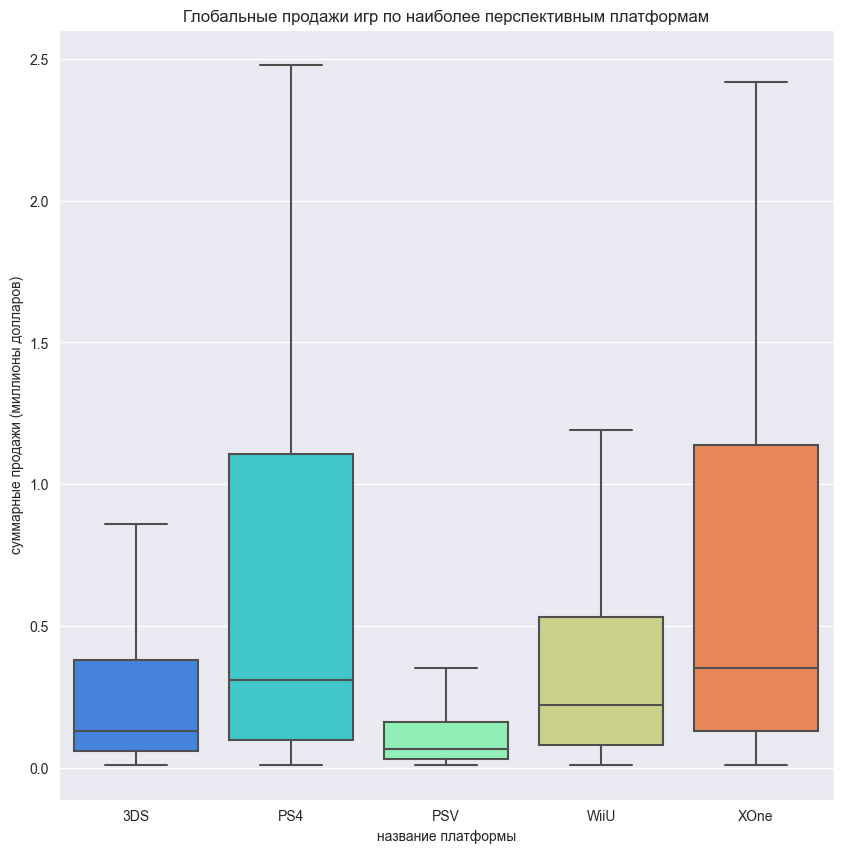

In [178]:
fig = plt.subplots(figsize=(10,10))
plt.title("Глобальные продажи игр по наиболее перспективным платформам")
plot = sns.boxplot(x="platform", y="sum_sales", data=name_sale, palette='rainbow', showfliers=False)
plt.xlabel('название платформы')
plt.ylabel('суммарные продажи (миллионы долларов)')
plt.show()

По всем платформам наблюдается превышение среднего значения над медианным: для Playstation4 и XBoxOne наиболее сильно, для 3DS и WiiU - чуть меньше, и для PlayStationVita - относительно небольшой. Также видим различия в медианных значениях: игры yf Playstation4 и XBoxOne имеют схожие боксплоты (квартильные, средние и медианные значения), а WiiU характеризуется меньшим значением; затем идёт 3DS и PlayStationVita.

Это может быть связано с разнобразием игр на ведущих платформах: поскольку платформы Playstation и XBox достаточно давно приобрели популярность среди потребителей, они могут позволить себе выпуск достаточно ранжированного по цене игрового контента, способного найти "своего" потребителя: поэтому их графики шире и растянутее. Wii тоже достаточно старая (в версиях предыдущих поколений), но менее популярная - соответственно разнообразие игр на данной платформе может быть ниже. Что касается PlaystationVita - это консоль с небольшим разнообразием игр, которые, как мы видим по графику, схожи в ценовой категории и по продажам - разброс по данной платформе самый небольшой, и среднее значение не сильно превосходит медианное.

## Как влияют на продажи игр  отзывы пользователей и критиков

Посмотрим ак влияют на продажи игр Sony PlayStation 4 отзывы пользователей и критиков

Построим диаграмму рассеяния и посчитаем корреляцию между отзывами и продажами.

C:\Users\som\Documents\Projects\studying_the_patterns_that_determine_the_success_of_game\venv\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\som\Documents\Projects\studying_the_patterns_that_determine_the_success_of_game\venv\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\som\Documents\Projects\studying_the_patterns_that_determine_the_success_of_game\venv\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


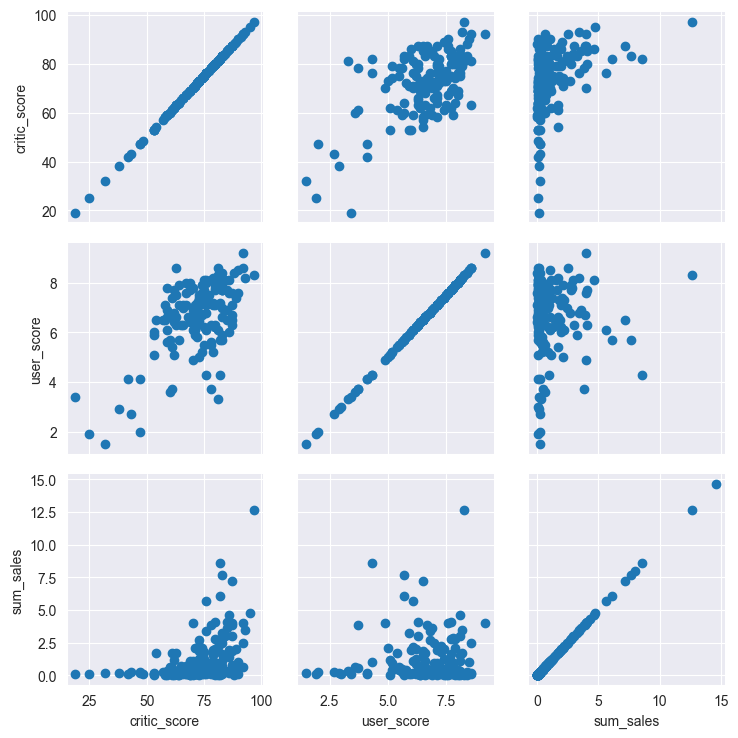

In [179]:
ps4_data = games_popular.loc[games_popular['platform'] == 'PS4']
scaterplots_ps4 = sns.PairGrid(ps4_data[['critic_score', 'user_score', 'sum_sales']])
scaterplots_ps4.map(plt.scatter)
plt.show()

In [180]:
correlation_ps4 = ps4_data[['year_of_release', 'na_sales', 'eu_sales', 'jp_sales', 'other_sales','critic_score', 'user_score', 'sum_sales']].corr()
correlation_ps4

,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,sum_sales
year_of_release,1.000000,-0.140545,-0.131149,-0.005186,-0.131494,-0.005862,0.216117,-0.137386
na_sales,-0.140545,1.000000,0.810579,0.530825,0.953340,0.415750,0.035654,0.939381
eu_sales,-0.131149,0.810579,1.000000,0.539344,0.948770,0.349570,-0.001902,0.961354
jp_sales,-0.005186,0.530825,0.539344,1.000000,0.562439,0.284392,0.225118,0.588567
other_sales,-0.131494,0.953340,0.948770,0.562439,1.000000,0.408263,0.021918,0.998291
critic_score,-0.005862,0.415750,0.349570,0.284392,0.408263,1.000000,0.610803,0.405398
user_score,0.216117,0.035654,-0.001902,0.225118,0.021918,0.610803,1.000000,0.024231
sum_sales,-0.137386,0.939381,0.961354,0.588567,0.998291,0.405398,0.024231,1.000000


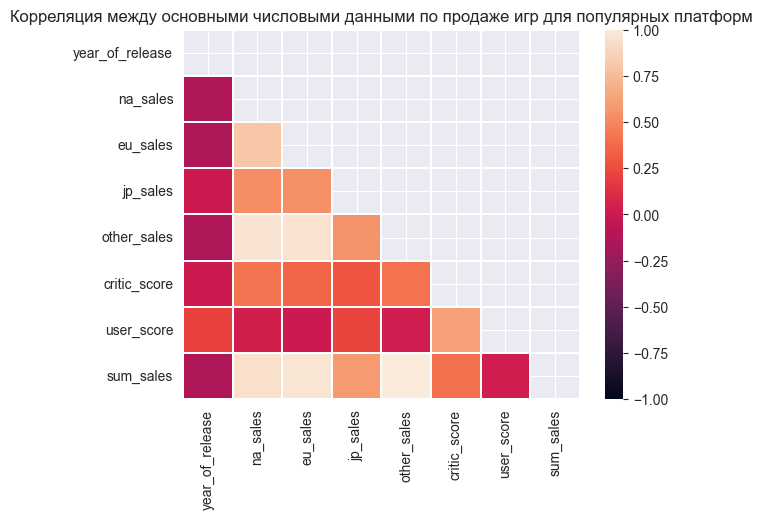

In [181]:
fig, ax = plt.subplots()
plt.title("Корреляция между основными числовыми данными по продаже игр для популярных платформ")
mask = np.triu(np.ones_like(correlation_ps4, dtype=np.bool_))
sns.heatmap(correlation_ps4, vmin=-1, vmax=1, linewidths=.3, mask=mask, ax=ax)
plt.show()

Коэффициент корреляции между оценками критиков и продажами игр Playstation4 составил 0,41 (по региональным продажам этот коэффициент примерно схож - 0,35-0,42, кроме Японии - 0,28), что говорит о небольшой зависимости между этими показателями. Этот же вывод мы можем сделать из диаграммы рассеяния: игры с низкими оценками критиков практически не продаются, в то время как игры с высокими оценками имеют больше продаж. С одной стороны, это может быть связано с тем, что люди обращают внимание на оценку игры, прежде чем покупают её (но корреляция невысокая, соответственно, это не ключевой показатель).

Коэффициент корреляции между оценками пользователей и продажами составил 0,02, что говорит об отсутствии зависимости между этими показателями. При этом диаграмма рассения схожа с диаграммой рассеяния по оценкам критиков продажам, но имеет больший разброс при низких оценках. Возможно, это связано с тем, что потребитель сначала покупает игру, а затем, поиграв, ставит ей оценку, исходя из субъективного впечатления. Таким образом, одна и та же игра может оставить как хорошее, так и плохое впечатление в зависимости от индивидуальных предпочтений. Интересно заметить, что в Японии ситуация несколько иная: корреляция между отзывами потребителей и продажами составляет 23%. Возможно, потребители в этом регионе более ответственно относятся к покупкам, либо имеют схожий вкус.

Но если без лирики,то связь оценок с сумммами продаж очень слабая. Соответственно, на продажи игр влияют какие-то иные факторы.

Теперь в совокупности рассмотрим самые популярные платформы (исходя из суммарных продаж за последние годы), которые мы выделили ранее: 3DS, Playstation4, PlaystationVita, WiiU и XBoxOne.

C:\Users\som\Documents\Projects\studying_the_patterns_that_determine_the_success_of_game\venv\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\som\Documents\Projects\studying_the_patterns_that_determine_the_success_of_game\venv\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\som\Documents\Projects\studying_the_patterns_that_determine_the_success_of_game\venv\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


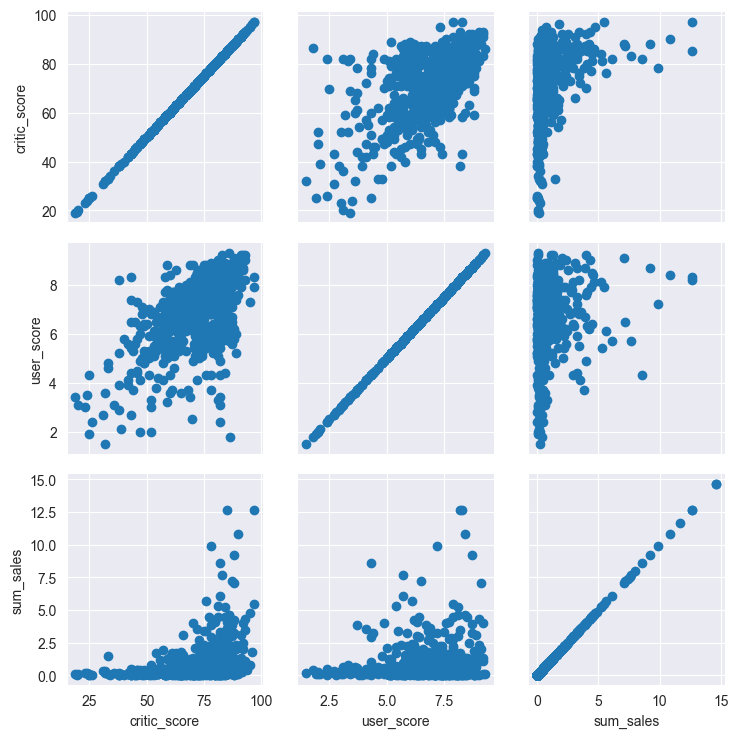

In [182]:
scaterplots = sns.PairGrid(games_popular[['critic_score', 'user_score', 'sum_sales']])
scaterplots.map(plt.scatter)
plt.show()

In [183]:
correlation = games_popular[['year_of_release', 'na_sales', 'eu_sales', 'jp_sales', 'other_sales','critic_score', 'user_score', 'sum_sales']].corr()
correlation

,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,sum_sales
year_of_release,1.000000,0.012108,0.040565,-0.060266,0.066655,0.160040,0.079732,0.013098
na_sales,0.012108,1.000000,0.814308,0.420221,0.844892,0.332814,0.061478,0.933196
eu_sales,0.040565,0.814308,1.000000,0.370357,0.936392,0.296709,0.030142,0.925977
jp_sales,-0.060266,0.420221,0.370357,1.000000,0.256984,0.167467,0.211117,0.600676
other_sales,0.066655,0.844892,0.936392,0.256984,1.000000,0.313511,0.027576,0.892625
critic_score,0.160040,0.332814,0.296709,0.167467,0.313511,1.000000,0.573652,0.334545
user_score,0.079732,0.061478,0.030142,0.211117,0.027576,0.573652,1.000000,0.085257
sum_sales,0.013098,0.933196,0.925977,0.600676,0.892625,0.334545,0.085257,1.000000


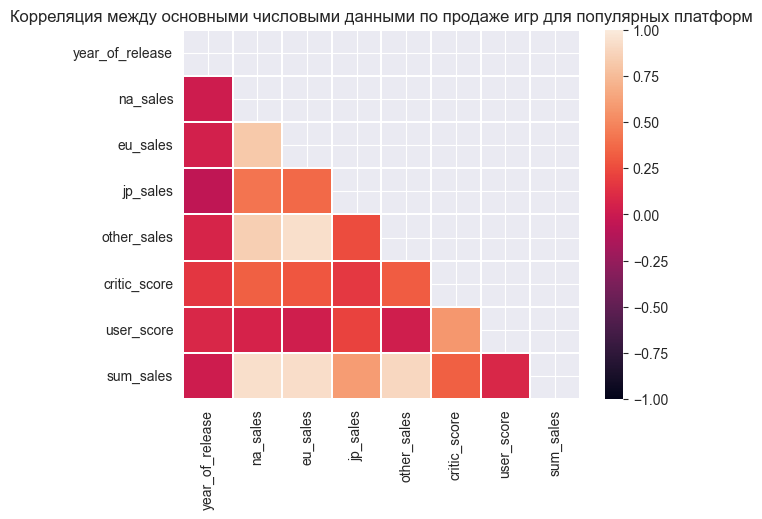

In [184]:
fig, ax = plt.subplots()
plt.title("Корреляция между основными числовыми данными по продаже игр для популярных платформ")
mask = np.triu(np.ones_like(correlation, dtype=np.bool_))
sns.heatmap(correlation, vmin=-1, vmax=1, linewidths=.3, mask=mask, ax=ax)
plt.show()

Коэффициент корреляции между оценками критиков и продажами для популярных платформ составил 0,33 (по региональным продажам этот коэффициент примерно схож, но в Японии составляет 17%), что говорит об еще меньшей зависимости между этими показателями, чем для Playstation4. Диаграмма рассеяния тоже имеет больше разбросанных значений при средних и низких оценках. Соответственно вцелом для игр на популярных платформах отзывы критиков еще менее важны покупателям.

Коэффициент корреляции между оценками покупателей и продажами составил 0,08, что не сильно отличается от показателя на Playstation4. Соответственно, на продажи игр влияют какие-то иные факторы.

## Распределение игр и продаж по жанрам

C:\Users\som\Documents\Projects\studying_the_patterns_that_determine_the_success_of_game\venv\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\som\Documents\Projects\studying_the_patterns_that_determine_the_success_of_game\venv\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\som\Documents\Projects\studying_the_patterns_that_determine_the_success_of_game\venv\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


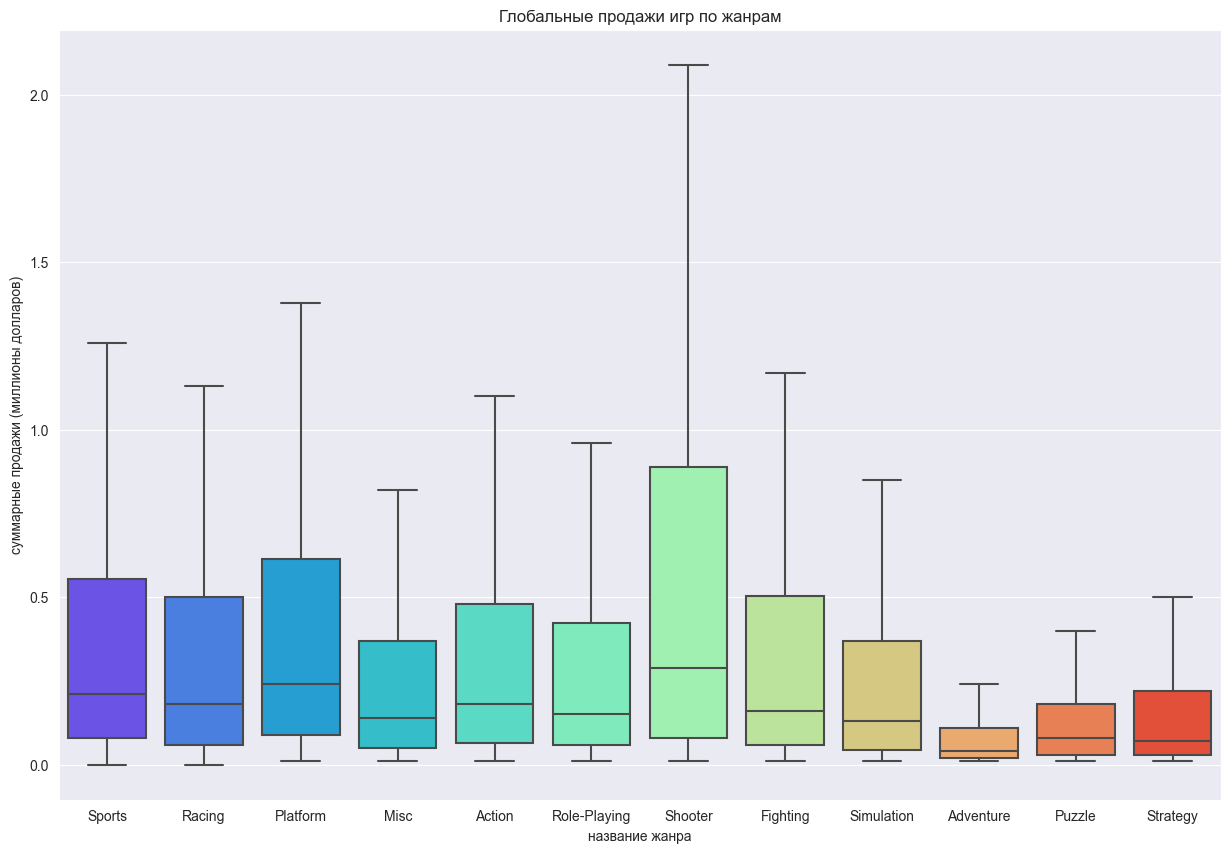

In [253]:
fig = plt.subplots(figsize=(15,10))
plt.title("Глобальные продажи игр по жанрам")
plot = sns.boxplot(x="genre", y="sum_sales", data=games_actual, palette='rainbow', showfliers=False)
plt.xlabel('название жанра')
plt.ylabel('суммарные продажи (миллионы долларов)')
plt.show()

In [186]:
(games_actual
             .pivot_table(index='genre', values='sum_sales', aggfunc='sum')
             .sort_values(by='sum_sales', ascending=False)
             .reset_index()
)

,genre,sum_sales
0,Action,1102.54
1,Sports,774.74
2,Shooter,684.14
3,Misc,555.18
4,Role-Playing,504.58
5,Racing,296.29
6,Platform,276.99
7,Simulation,219.26
8,Fighting,184.18
9,Adventure,137.55


Самым прибыльным жанром является "Экшн", при этом основные покупатели потратили не настолько большую сумму на покупку игр в данном жанре. То есть прибыльность жанра связана с продажей нескольких, выбивающихся, дорогих игр. На втором месте по доходу за анализируемый актуальный период находится жанр "Спорт", но для спортивных игр характерна та же ситуация, что и для игр в жанре "Экшн": сверхдоходность, скорее всего, связана с продажей каких-то очень дорогих игр,но не является правилом для всего жанра.

Иная ситуация с третьей по доходности позицией: жанром "Шутер". Это самое доходное, в среднем, направление игр, пользующееся высоким спросом. Средний и медианный уровни продаж этого жанра выше значений по любому другому жанру; а также датасет в разрезе данного жанра сильно скошен вправо (очень много покупателей покупает отдельные игры с высокой ценой), а значит, это перспективное направление для продажи.

Стратегии принесли самый низкий доход, но это не значит, что покупатели приобретают в этом жанре самые дешевые игры, в сравнении с другими жанрами. Мы наблюдаем подобную ситуацию как для "Экшна" и "Спорта", но действующую зеркально. Жанр "Квест" имеет схожую со "Стратегией" характеристику по продаваемости: они слабо продаются и принесли минимальный доход, но это не самые неперспективные жанры.

Самым неперспективным жанром игр для продаж является "Приключения". Он на третьем месте с конца по суммарным продажам; и по распределению наибольшее число игр было продана за низшую, по сравнению с другими жанрами, стоимость.

# Шаг 4. Составление портрета пользователя каждого региона

## Самые популярные платформы

### Северная Америка

In [189]:
na_popular_games = (games_actual
                                .pivot_table(index='platform', values='na_sales', aggfunc='sum')
                                .sort_values(by='na_sales', ascending=False)
                                .reset_index()
                   )
na_popular_games['na_ratio'] = round(na_popular_games['na_sales'] / sum(na_popular_games['na_sales']), 3)
na_mostpopular_games = na_popular_games.head()
na_mostpopular_games

,platform,na_sales,na_ratio
0,X360,590.78,0.251
1,Wii,493.95,0.209
2,PS3,390.93,0.166
3,DS,325.06,0.138
4,PS2,115.63,0.049


В Северной Америке наиболее продаваемыми играми за анализируемый период являются игры на платформе XBox360, Wii, Playstation3, DS и Playstation2.

Рассмотрим продаваемость игр на выделенных ранее наиболее перспективных платформах.

In [192]:
na_persp_games = na_popular_games.loc[na_popular_games['platform'].isin(profitable_platforms)==True]
na_persp_games

,platform,na_sales,na_ratio
5,PS4,87.25,0.037
7,3DS,78.97,0.033
8,XOne,78.85,0.033
10,WiiU,36.00,0.015
11,PSV,12.32,0.005


Наиболее популярными играми на перспективных платформах в Северной Америке являются игры на Playstation4, затем - XBoxOne, после них - 3DS, WiiU и, наконец, PlaystationVita.

### Европа

In [193]:
eu_popular_games = (games_actual
                                .pivot_table(index='platform', values='eu_sales', aggfunc='sum')
                                .sort_values(by='eu_sales', ascending=False)
                                .reset_index()
                   )
eu_popular_games['eu_ratio'] = round(eu_popular_games['eu_sales'] / sum(eu_popular_games['eu_sales']), 3)
eu_mostpopular_games = eu_popular_games.head()
eu_mostpopular_games

,platform,eu_sales,eu_ratio
0,PS3,327.57,0.225
1,X360,268.54,0.185
2,Wii,261.37,0.180
3,DS,143.30,0.098
4,PS4,109.31,0.075


В Европе наиболее продаваемыми играми за анализируемый период являются игры на платформе Playstation3, XBox360, Wii, DS и Playstation4.

Рассмотрим  продаваемость игр.

In [196]:
eu_persp_games = eu_popular_games.loc[eu_popular_games['platform'].isin(profitable_platforms)==True]
eu_persp_games

,platform,eu_sales,eu_ratio
4,PS4,109.31,0.075
6,3DS,59.13,0.041
9,XOne,41.96,0.029
10,WiiU,23.65,0.016
11,PSV,12.68,0.009


Наиболее популярными играми на перспективных платформах в Европе являются игры на Playstation4 (попали в ТОП5 по продаваемости из всех платформ за актуальный период), затем - 3DS, после них - XBoxone, WiiU и, наконец, PlaystationVita.

### Япония

In [199]:
jp_popular_games = (games_actual
                                .pivot_table(index='platform', values='jp_sales', aggfunc='sum')
                                .sort_values(by='jp_sales', ascending=False)
                                .reset_index()
                   )
jp_popular_games['jp_ratio'] = round(jp_popular_games['jp_sales'] / sum(jp_popular_games['jp_sales']), 3)
jp_mostpopular_games = jp_popular_games.head()
jp_mostpopular_games

,platform,jp_sales,jp_ratio
0,DS,141.49,0.260
1,3DS,92.59,0.170
2,PS3,78.21,0.144
3,PSP,71.13,0.131
4,Wii,69.05,0.127


В Японии наиболее продаваемыми играми за анализируемый период являются игры на платформе DS, 3DS, Playstation3, PlaystationPortable, Wii.

Рассмотрим также продаваемость игр.

In [201]:
jp_persp_games = jp_popular_games.loc[jp_popular_games['platform'].isin(profitable_platforms)==True]
jp_persp_games

,platform,jp_sales,jp_ratio
1,3DS,92.59,0.170
6,PSV,18.28,0.034
7,WiiU,12.34,0.023
9,PS4,10.22,0.019
11,XOne,0.33,0.001


Наиболее популярными играми на перспективных платформах в Японии являются игры на 3DS (заняла второе место по продаваемости из всех платформ за актуальный период), затем - PlaystationVita, после них - WiiU и, наконец, Playstation4. Игры на платформе XBoxOne в Японии не продаются (возможно, они вовсе не представлены на рынке; либо не пользуются спросом).

### Сопоставление регионов

Сведём доли продаж по популярным платформам в регионах в единую таблицу и сравним показатели.

In [203]:
mostpopular_games = na_mostpopular_games.merge(eu_mostpopular_games, on=['platform'], how='outer')
mostpopular_games = mostpopular_games.merge(jp_mostpopular_games, on=['platform'], how='outer')
mostpopular_games.drop(['na_sales', 'eu_sales', 'jp_sales'], axis='columns', inplace=True)
mostpopular_games.sort_values(by='platform').reset_index(drop=True)

,platform,na_ratio,eu_ratio,jp_ratio
0,3DS,NaN,NaN,0.170
1,DS,0.138,0.098,0.260
2,PS2,0.049,NaN,NaN
3,PS3,0.166,0.225,0.144
4,PS4,NaN,0.075,NaN
5,PSP,NaN,NaN,0.131
6,Wii,0.209,0.180,0.127
7,X360,0.251,0.185,NaN


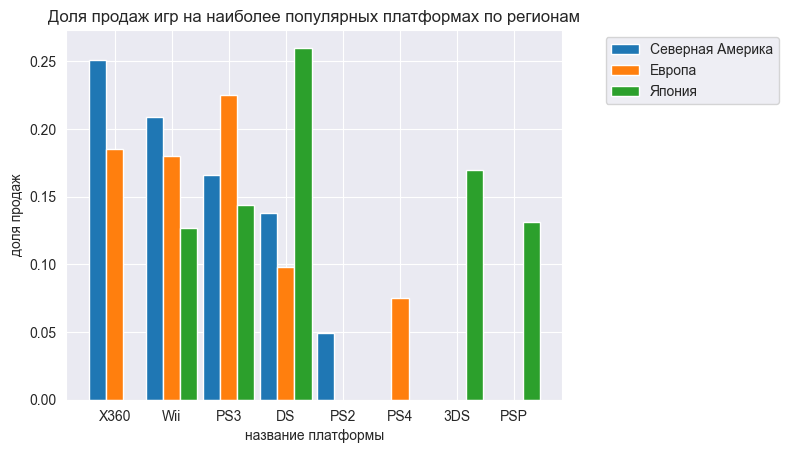

In [204]:
fig, ax = plt.subplots()
ax.set(title='Доля продаж игр на наиболее популярных платформах по регионам',
       xlabel='название платформы', ylabel='доля продаж')
x1 = np.arange(1,9) - 0.3
x2 = np.arange(1,9)
x3 = np.arange(1,9) + 0.3
plt.xticks([1, 2, 3, 4, 5, 6, 7, 8], ['X360', 'Wii', 'PS3', 'DS', 'PS2', 'PS4', '3DS', 'PSP'])
ax.bar(x1, mostpopular_games['na_ratio'], width=0.3, label='Северная Америка')
ax.bar(x2, mostpopular_games['eu_ratio'], width=0.3, label='Европа')
ax.bar(x3, mostpopular_games['jp_ratio'], width=0.3, label='Япония')
ax.grid=True
ax.legend(bbox_to_anchor=(1.45, 1), frameon=True, loc='upper right')
plt.show()

В Северной Америке наиболее популярны игры на платформе XBox360 (доля продаж 25%), на этой же платформе достаточно популярны игры в Европе (18% от всех продаж по региону), а в Японии они не продавались. В Европе самыми популярными являются игры на Playstation3 (23% от продаж по региону), на этой же платформе достаточно популярны игры в Северной Америке (доля продаж 17%) и в Японии (доля подаж 14%). В Японии наиболее продаваемыми являются игры на платформе DS (продажи составили 26%), платформа менее популярна в Северной Америке (14% от всех продаж) и Европе (10% от продаж). Также достаточно популярны во всех регионах игры на платформе Wii: в Северной Америке продажи составили 21% (второе место по популярности среди платформ), в Европе - 18% (делит 2-3 место с XBox360), в Японии - 13% (делит 4-5 место с PlaystationPortable).

Также существуют игры на платформах, ставших наиболее популярными только в одном регионе: Playstation2 для Северной Америки; Playstation4 для Европы; 3DS и PlaystatonPortable для Японии.

Сведём доли продаж по потенциально прибыльным платформам в регионах в единую таблицу и сравним показатели.

In [254]:
persp_games = na_persp_games.merge(eu_persp_games, on=['platform'], how='outer')
persp_games = persp_games.merge(jp_persp_games, on=['platform'], how='outer')
persp_games.drop(['na_sales', 'eu_sales', 'jp_sales'], axis='columns', inplace=True)
persp_games.sort_values(by='platform').reset_index(drop=True)

,platform,na_ratio,eu_ratio,jp_ratio
0,3DS,0.033,0.041,0.170
1,PS4,0.037,0.075,0.019
2,PSV,0.005,0.009,0.034
3,WiiU,0.015,0.016,0.023
4,XOne,0.033,0.029,0.001


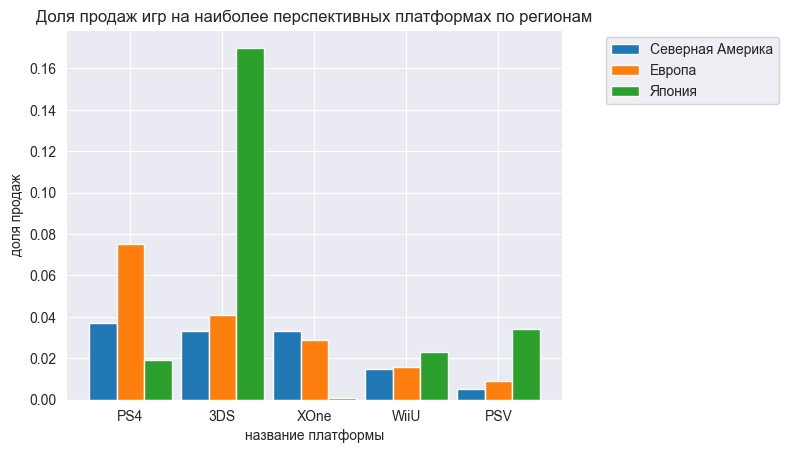

In [257]:
fig, ax = plt.subplots()
ax.set(title='Доля продаж игр на наиболее перспективных платформах по регионам',
       xlabel='название платформы', ylabel='доля продаж')
x1 = np.arange(1,6) - 0.3
x2 = np.arange(1,6)
x3 = np.arange(1,6) + 0.3
plt.xticks([1, 2, 3, 4, 5], ['PS4', '3DS', 'XOne', 'WiiU', 'PSV'])
ax.bar(x1, persp_games['na_ratio'], width=0.3, label='Северная Америка')
ax.bar(x2, persp_games['eu_ratio'], width=0.3, label='Европа')
ax.bar(x3, persp_games['jp_ratio'], width=0.3, label='Япония')
ax.grid=True
ax.legend(bbox_to_anchor=(1.45, 1), frameon=True, loc='upper right')
plt.show()

По перспективным для 2017 года платформам наблюдаем следующие распределения долей по продажам в регионах. В Северной Америке и Европе наиболее популярна Playstation4 (4% от продаж и 8% от продаж, соответственно по регионам). В Японии самой популярной является 3DS (17%), которая в других регионах занимет второе место из перспективных (3% в Северной Америке и 4% в Европе). Также в Северной Америке и Европе популярна платформа XBoxOne, игры на которой не продаются в Японии.

Небольшие процены по продажам говорят о том, что игры на платформах только набирают популярность. Но есть и те, которые при своём росте продаж уже занимают ведущие места среди всех ранее продаваемых платформ (Playstation4 для Европы и 3DS для Японии).

## Самые популярные жанры

### Северная Америка

In [209]:
na_popular_genres = (games_actual
                                .pivot_table(index='genre', values='na_sales', aggfunc='sum')
                                .sort_values(by='na_sales', ascending=False)
                                .reset_index()
                   )
na_popular_genres['na_ratio'] = round(na_popular_genres['na_sales'] / sum(na_popular_genres['na_sales']), 3)
na_mostpopular_genres = na_popular_genres.head()
na_mostpopular_genres

,genre,na_sales,na_ratio
0,Action,529.63,0.225
1,Sports,391.88,0.166
2,Shooter,359.41,0.152
3,Misc,285.44,0.121
4,Role-Playing,193.82,0.082


В Северной Америке наиболее продаваемыми играми за анализируемый период являются игры в жанрах "Экшн", "Спорт", "Шутер", "Прочие", "Ролевые".

### Европа

In [210]:
eu_popular_genres = (games_actual
                                .pivot_table(index='genre', values='eu_sales', aggfunc='sum')
                                .sort_values(by='eu_sales', ascending=False)
                                .reset_index()
                   )
eu_popular_genres['eu_ratio'] = round(eu_popular_genres['eu_sales'] / sum(eu_popular_genres['eu_sales']), 3)
eu_mostpopular_genres = eu_popular_genres.head()
eu_mostpopular_genres

,genre,eu_sales,eu_ratio
0,Action,345.67,0.238
1,Sports,240.41,0.165
2,Shooter,225.16,0.155
3,Misc,146.77,0.101
4,Racing,111.65,0.077


В Европе наиболее продаваемыми играми за анализируемый период являются игры в жанрах "Экшн", "Спорт", "Шутер", "Прочие", "Гонки".

### Япония

In [212]:
jp_popular_genres = (games_actual
                                .pivot_table(index='genre', values='jp_sales', aggfunc='sum')
                                .sort_values(by='jp_sales', ascending=False)
                                .reset_index()
                   )
jp_popular_genres['jp_ratio'] = round(jp_popular_genres['jp_sales'] / sum(jp_popular_genres['jp_sales']), 3)
jp_mostpopular_genres = jp_popular_genres.head()
jp_mostpopular_genres

,genre,jp_sales,jp_ratio
0,Role-Playing,163.97,0.302
1,Action,95.01,0.175
2,Misc,64.51,0.119
3,Sports,48.31,0.089
4,Platform,35.09,0.065


В Японии наиболее продаваемыми играми за анализируемый период являются игры в жанрах "Ролевые", "Экшн", "Прочие", "Спорт", "Платформер".

### Сопоставление регионов

Сведём доли продаж по популярным жанрам в регионах в единую таблицу и сравним показатели.

In [214]:
mostpopular_genres = na_mostpopular_genres.merge(eu_mostpopular_genres, on=['genre'], how='outer')
mostpopular_genres = mostpopular_genres.merge(jp_mostpopular_genres, on=['genre'], how='outer')
mostpopular_genres.drop(['na_sales', 'eu_sales', 'jp_sales'], axis='columns', inplace=True)
mostpopular_genres.sort_values(by='genre').reset_index(drop=True)

,genre,na_ratio,eu_ratio,jp_ratio
0,Action,0.225,0.238,0.175
1,Misc,0.121,0.101,0.119
2,Platform,NaN,NaN,0.065
3,Racing,NaN,0.077,NaN
4,Role-Playing,0.082,NaN,0.302
5,Shooter,0.152,0.155,NaN
6,Sports,0.166,0.165,0.089


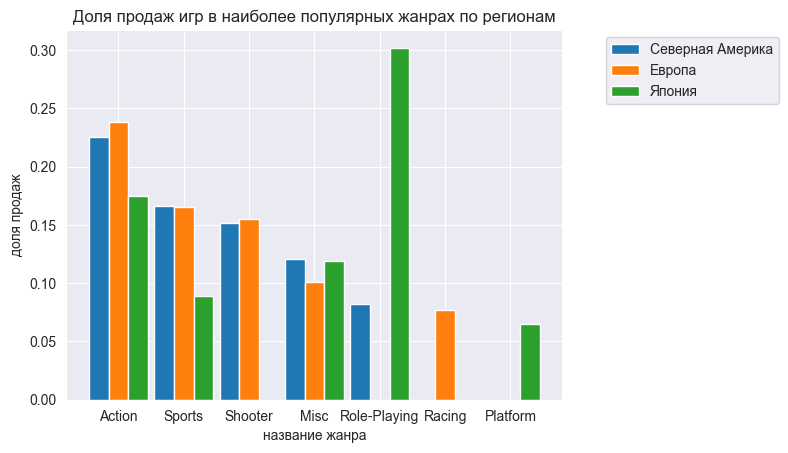

In [215]:
fig, ax = plt.subplots()
ax.set(title='Доля продаж игр в наиболее популярных жанрах по регионам',
       xlabel='название жанра', ylabel='доля продаж')
x1 = np.arange(1,8) - 0.3
x2 = np.arange(1,8)
x3 = np.arange(1,8) + 0.3
plt.xticks([1, 2, 3, 4, 5, 6, 7], ['Action', 'Sports', 'Shooter', 'Misc', 'Role-Playing', 'Racing', 'Platform'])
ax.bar(x1, mostpopular_genres['na_ratio'], width=0.3, label='Северная Америка')
ax.bar(x2, mostpopular_genres['eu_ratio'], width=0.3, label='Европа')
ax.bar(x3, mostpopular_genres['jp_ratio'], width=0.3, label='Япония')
ax.grid=True
ax.legend(bbox_to_anchor=(1.45, 1), frameon=True, loc='upper right')
plt.show()

Во всех трёх регионах достаточно популярны игры в жанре "Экшн" (22% продаж для Северной Америки, 24% - для Европы, 18% - для Японии). В Японии самыми популярными являются игры в жанре "Ролевые" (30% продаж по региону), в Северной Америке доля продаж игр данного жанра составила 8%, а в Европе они вовсе не пользуются спросом.

Отдельно следует выделить категорию "Прочие" - это те игры, которые по названию жанра не принадлежать ни к одной из основных категорий - они достаточно популярны во всех регионах (доля продаж в регионах около 12% от региональных продаж). Как правило, это социальные игры, игры-шоу, либо игры, предполагающие обучение чему-то (например, достаточно популярная Just Dance - развивающая танцевальные навыки). Популярность этих игр связана с переходом социализации и обучения в сеть; и удобством их использования для современного поколения.

Также существуют игры на платформах, ставших наиболее популярными только в одном регионе: "Гонки" для Европы и "Платформер" для Японии.

Различия в приверженности определённым жанрам могут быть в том числе связаны с различиями в популярности платформ в регионах. К примеру, игры в жанре "Шутер" непопулярны в Японии. Но, возможно, игр в этом жанре не так много на популярном в регионе платформере. В то же время различия в предпочтениях могут быть связаны с культурными особенностями, формирующими предпочтения потребителей. В Северной Америке и Европе очень схожи доли продаж популярных жанров, но и культура достаточно близка; в Японии предпочтения отличаются.

## Влияние рейтинга ESRB на продажи

### Северная Америка

In [217]:
na_rating_sales = (games_actual
                                .pivot_table(index='rating', values='na_sales', aggfunc='sum')
                                .sort_values(by='na_sales', ascending=False)
                                .reset_index()
                   )
na_rating_sales['na_ratio'] = round(na_rating_sales['na_sales'] / sum(na_rating_sales['na_sales']), 3)
na_rating_sales

,rating,na_sales,na_ratio
0,E,805.56,0.378
1,M,573.04,0.269
2,T,424.88,0.200
3,E10+,324.96,0.153


RP - это игры с рейтингом "Рейтинг ожидается", что равносильно пропущенным значениям. Соответственно, данный рейтинг нам неинтересен.

В Северной Америке наиболее продаваемыми играми за анализируемый период являются игры c рейтингом E ("для всех") - 38% от продаж; на втором месте игры с рейтингом M ("для взрослых") - 27%; на третьем месте игры с рейтингом T ("подросткам") - 20%; на четвёртом месте игры с рейтингом E10+ ("для всех от 10 лет и старше") - 15%.

### Европа

In [218]:
eu_rating_sales = (games_actual
                                .pivot_table(index='rating', values='eu_sales', aggfunc='sum')
                                .sort_values(by='eu_sales', ascending=False)
                                .reset_index()
                   )
eu_rating_sales['eu_ratio'] = round(eu_rating_sales['eu_sales'] / sum(eu_rating_sales['eu_sales']), 3)
eu_rating_sales

,rating,eu_sales,eu_ratio
0,E,453.57,0.359
1,M,397.41,0.314
2,T,232.73,0.184
3,E10+,179.98,0.142


В Европе наиболее продаваемыми играми за анализируемый период являются игры c рейтингом E ("для всех") - 36% от продаж; на втором месте игры с рейтингом M ("для взрослых") - 31%; на третьем месте игры с рейтингом T ("подросткам") - 18,4%; на четвёртом месте игры с рейтингом E10+ ("для всех от 10 лет и старше") - 14,2%.

### Япония

In [219]:
jp_rating_sales = (games_actual
                                .pivot_table(index='rating', values='jp_sales', aggfunc='sum')
                                .sort_values(by='jp_sales', ascending=False)
                                .reset_index()
                   )
jp_rating_sales['jp_ratio'] = round(jp_rating_sales['jp_sales'] / sum(jp_rating_sales['jp_sales']), 3)
jp_rating_sales

,rating,jp_sales,jp_ratio
0,E,120.98,0.417
1,T,87.83,0.303
2,M,44.67,0.154
3,E10+,36.52,0.126


В Японии наиболее продаваемыми играми за анализируемый период являются игры c рейтингом E ("для всех") - 41,7% от продаж; на втором месте игры с рейтингом T ("подросткам") - 30%; на третьем месте игры с рейтингом M ("для взрослых") - 15,4%; на четвёртом месте игры с рейтингом E10+ ("для всех от 10 лет и старше") - 12,6%; нет спроса на игры с рейтингом EC ("для детей младшего возраста").

Таким образом, в Северной Америке и Европе схожая структура продаж по рейтингу игр. В Японии предпочтения отличаются: подростковые игры более популярны, чем игры для взрослых. В остальном структура похожа. На игры для детей младшего возраста нет спроса ни в одном регионе.

# Шаг 6. Общий вывод

Основные выводы, полученные в ходе проведенного исследования:
- Актуальным временным периодом для определения стратегии продаж на 2017 год является период с 2011 года, так как он является актуальным для современного поколения консолей и имеет схожие показатели по количеству игр выпущенных в один год;
- Жизненный цикл платформы составляет 8-10 лет, а новые поколения платформ появляются примерно раз в 7 лет. Так что не стоит выставлять на продажу игры на платформах, для которых срок выпуска приближается к 6-8 годам (основной доход можно получить от продаж игр на платформах, вышедших до 6 лет назад).;
- Потенциально прибыльными платформами можно назвать:
    - Sony PlayStation 4 и Microsoft Xbox One - у них наблюдается рост продаж, и они лидируют на рынке, на них имеет смысл делать акцент;
    - Nintendo 3DS и Wii U и Sony PlayStation Vita - у них еще не закончился жизненный цикл, но продажи будут значительно меньше, чем у Sony PlayStation 4 и Microsoft Xbox One;
- За актуальный период - игры на домашние консоли имеют большие продажи, чем портативные;
- Исходя из проведенного анализа связи между оценками критиков/пользователей и продажами игр на PS4, можно сделать вывод что оценки пользователей практически не влияют на продажи, а вот на оценки критиков стоит посмотреть - есть шанс, что игра будет продаваться большим тиражом, но это не является правилом. Можно ожидать, что это правило распространяется и на другие платформы;
- Если ориентироваться на глобальный рынок, то имеет смысл акцентировать внимание на играх жанров "Экшн", "Спорт" и "Шутер" Самым прибыльным жанром является "Экшн", при этом основные покупатели потратили не настолько большую сумму на покупку игр в данном жанре. То есть прибыльность жанра связана с продажей нескольких, выбивающихся, дорогих игр. На втором месте по доходу за анализируемый актуальный период находится жанр "Спорт", но для спортивных игр характерна та же ситуация, что и для игр в жанре "Экшн": сверхдоходность, скорее всего, связана с продажей каких-то очень дорогих игр,но не является правилом для всего жанра.
 Поэтрму более правильной стратегией будет более точное формирование продаж по жанрам и платформам в разных странах:
    - Для Северной Америки и Европы стоит сделать акцент на домашние консоли Microsoft (в большей степени для Северной Америки) и Sony (в большей степени для Европы), а также Nintendo 3DS. Что касается жанров, то интересы геймеров тут схожи с глобальной статистикой;
    - Для Японии стоит сделать акцент на их отечественные консоли. В основном - Nintendo 3DS, PS3, PS Vita, PS4 и Wii U. Консоли Microsoft имеют практически нулевые продажи. Что касается жанров, то интересы геймеров тут значительно отличаются от таковых в других регионах: в Японии доминируют жанры Role-Playing и Action;
- Также в разных регионах стоит акцентировать внимание на игры с разным рейтингом ESRB, но рейтинг имеет не такое значительно влияние, как платформа и жанр. В каждом из регионов рекомендуется осуществлять продажи игр с рейтингом E (“для всех”). В Северной Америке и Европе также возможны высокие продажи игр с рейтингом M (“для взрослых”), а в Японии - с рейтингом T (“для подростков”).